In [7]:
import pickle
import plotly.io as pio
import plotly.graph_objects as go
import plotly.express as px
import json
import pandas as pd
import numpy as np
import os
import glob
import os.path
import plotly.graph_objs as go
from itertools import product
from plotly.subplots import make_subplots
import  plotly.graph_objs as go 
import plotly
from itertools import product
from statsmodels.sandbox.stats.multicomp import multipletests
import h5py
import matplotlib.pyplot as plt
from scipy.spatial.distance import squareform

In [8]:
# Version 2
mult_reg_results_n_v_2, _, _,rsquared_n_v_2  = pd.read_pickle('/auto/data2/oelmas/RSA_Results_V2/Naive/Video/correlation_hamming_regression_results.pkl')
mult_reg_results_n_mf_2, _, _,rsquared_n_mf_2   = pd.read_pickle('/auto/data2/oelmas/RSA_Results_V2/Naive/Still_MF/correlation_hamming_regression_results.pkl')
mult_reg_results_n_ff_2, _, _,rsquared_n_ff_2   = pd.read_pickle('/auto/data2/oelmas/RSA_Results_V2/Naive/Still_FF/correlation_hamming_regression_results.pkl')

mult_reg_results_p_v_2, _, _,rsquared_p_s_2   = pd.read_pickle('/auto/data2/oelmas/RSA_Results_V2/Prior/Video/correlation_hamming_regression_results.pkl')
mult_reg_results_p_s_2, _, _,rsquared_p_v_2   = pd.read_pickle('/auto/data2/oelmas/RSA_Results_V2/Prior/Still/correlation_hamming_regression_results.pkl')

v2_mult_reg_results = [mult_reg_results_n_v_2, mult_reg_results_n_mf_2, mult_reg_results_n_ff_2,mult_reg_results_p_v_2, mult_reg_results_p_s_2]
v2_mult_reg_results = pd.concat(v2_mult_reg_results)

# Version 2 rsa
rsa_results_n_v_2, _, _  = pd.read_pickle('/auto/data2/oelmas/RSA_Results_V2/Naive/Video/correlation_hamming_avg_subjects_results.pkl')
rsa_results_n_mf_2, _, _  = pd.read_pickle('/auto/data2/oelmas/RSA_Results_V2/Naive/Still_MF/correlation_hamming_avg_subjects_results.pkl')
rsa_results_n_ff_2, _, _  = pd.read_pickle('/auto/data2/oelmas/RSA_Results_V2/Naive/Still_FF/correlation_hamming_avg_subjects_results.pkl')

rsa_results_p_v_2, _, _  = pd.read_pickle('/auto/data2/oelmas/RSA_Results_V2/Prior/Video/correlation_hamming_avg_subjects_results.pkl')
rsa_results_p_s_2, _, _  = pd.read_pickle('/auto/data2/oelmas/RSA_Results_V2/Prior/Still/correlation_hamming_avg_subjects_results.pkl')

v2_rsa_results = [rsa_results_n_v_2, rsa_results_n_mf_2, rsa_results_n_ff_2,rsa_results_p_v_2, rsa_results_p_s_2]
v2_rsa_results = pd.concat(v2_rsa_results)

In [8]:
def compare_mf(kendall_tau_df,mult_reg_df,model, er, version):
    fig = go.Figure()
    colors = px.colors.qualitative.Plotly 
    
    # Still-ff still-mf video Naive comparison plot
    # Plot the lines from kendall tau df
    for i, cond in enumerate(["still-ff","still-mf","video"]):
    # Plots the kendall tau curve
        name = model
        if cond == "still-ff":
            if "gabor" in model:
                model = "ff_gabor_model_correlation"
                name="gabor"
            elif "intensity" in model:
                model = "ff_pixel_intensity_model_correlation"
                name = "pixel_intensity"
        elif cond == "still-mf":
            if "gabor" in model:
                model = "mf_gabor_model_correlation"
                name = "gabor"
            elif "intensity" in model:
                model = "mf_pixel_intensity_model_correlation"
                name = "intensity"
        elif cond == "video":
            if "gabor" in model:
                model = "video_gabor__frames_correlation"
                name = "gabor"
            elif "intensity" in model:
                model= "avg_pixel_intensity_model_correlation"
                name = "intensity"
        kendall_tau_df_to_plot = kendall_tau_df[(kendall_tau_df["model_name"] ==model) 
                                & (kendall_tau_df["electrode_region"] == er)
                                & (kendall_tau_df["experiment_type"] == "naive")]

        mult_reg_df_to_plot = mult_reg_df[(mult_reg_df["model_name"] == model) 
                                & (mult_reg_df["electrode_region"] == er)
                                    & (mult_reg_df["experiment_type"] == "naive")]
        # Not sure about the bonferroni, should we do bonferroni for each line or all lines (400 or 1200)
        sig_idx = multipletests(mult_reg_df_to_plot["p_value"]/2, alpha=0.001, method='bonferroni')[0]
        mult_reg_df_to_plot.loc[:, 'significant'] = sig_idx.tolist()
        sig_reg_df = mult_reg_df_to_plot.loc[mult_reg_df_to_plot['significant']]
        sig_reg_df.loc[:, 'plot_y'] = [-1]*len(sig_reg_df)
        sig_times = sig_reg_df[sig_reg_df.stimuli_type== cond]["time"].tolist()
        df_to_plot = kendall_tau_df_to_plot[kendall_tau_df_to_plot.stimulus_type== cond]
        fig.add_trace(go.Scatter(x=df_to_plot["time"], y=df_to_plot["kendall_tau"],
                                legendgroup=cond,
                                mode='lines',
                                name=cond,
                                line_color = colors[i]))
        fig.add_trace(go.Scatter(mode='markers',legendgroup=cond,
                                x=sig_times,
                                y=[-.1-(i*.02) for _ in range(len(sig_times))],
                                marker=dict( size=2,color= colors[i]),
                                showlegend=False))
    plotly.offline.plot(fig, filename = "/auto/data2/oelmas/RSA_Results_V"+str(version)+"/Naive/"+name+"_"+er+"_"+str(version)+"_still-mf_comparison.html", auto_open=False)
    fig.write_image("/auto/data2/oelmas/RSA_Results_V"+str(version)+"/Naive/"+name+"_"+er+"_"+str(version)+"_still-mf_comparison.png")

In [30]:
v1_mult_reg_results["model_name"].unique()

array(['constant', 'action_category_hamming',
       'video_gabor__frames_correlation', 'agent_hamming',
       'flowModel_10_frames_correlation', 'mf_gabor_model_correlation',
       'ff_gabor_model_correlation'], dtype=object)

In [23]:
# Plots for all models parietal and occipital channels naive: still-ff, still-mf, video For version 2
arg_dict = {model : ["parietal","occipital"] for model in v2_rsa_results["model_name"].unique() if "motion" not in model}
for model, electrode_region_list in arg_dict.items():
    for electrode_region in electrode_region_list:    
        compare_mf(v2_rsa_results,v2_mult_reg_results,model,electrode_region,2)

In [32]:
# Plots for all models parietal and occipital channels naive: still-ff, still-mf, video For version ""
arg_dict = {model : ["parietal","occipital"] for model in v1_rsa_results["model_name"].unique() if "flow" not in model}
for model, electrode_region_list in arg_dict.items():
    for electrode_region in electrode_region_list:    
        compare_mf(v1_rsa_results,v1_mult_reg_results,model,electrode_region,1)

action_category_hamming   still-ff
action_category_hamming   still-mf
action_category_hamming   video


/auto/k2/oelmas/anaconda/envs/agent_perception_rsa/lib/python3.6/site-packages/pandas/core/indexing.py:845: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/auto/k2/oelmas/anaconda/envs/agent_perception_rsa/lib/python3.6/site-packages/pandas/core/indexing.py:966: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



action_category_hamming   still-ff
action_category_hamming   still-mf
action_category_hamming   video
agent_hamming   still-ff
agent_hamming   still-mf
agent_hamming   video
agent_hamming   still-ff
agent_hamming   still-mf
agent_hamming   video
ff_gabor_model_correlation   still-ff
mf_gabor_model_correlation   still-mf
video_gabor__frames_correlation   video
ff_gabor_model_correlation   still-ff
mf_gabor_model_correlation   still-mf
video_gabor__frames_correlation   video
ff_gabor_model_correlation   still-ff
mf_gabor_model_correlation   still-mf
video_gabor__frames_correlation   video
ff_gabor_model_correlation   still-ff
mf_gabor_model_correlation   still-mf
video_gabor__frames_correlation   video
ff_gabor_model_correlation   still-ff
mf_gabor_model_correlation   still-mf
video_gabor__frames_correlation   video
ff_gabor_model_correlation   still-ff
mf_gabor_model_correlation   still-mf
video_gabor__frames_correlation   video


In [35]:
# Using v2_rsa_results get the action model for all conditions and whole brain
mdl = "action_category_hamming"
er = "whole_brain"

mdl_idx = v2_rsa_results.model_name==mdl
er_idx = v2_rsa_results.electrode_region==er
tmp_df = v2_rsa_results[mdl_idx&er_idx]
mdl_idx = v2_mult_reg_results.model_name==mdl
er_idx = v2_mult_reg_results.electrode_region==er
            

In [36]:
fig = go.Figure()
line_type = {("naive","still-ff"):{"color": "green",'dash': 'dash'},
             ("naive","video"):{"color": "green",'dash': 'solid'},
             ("prior","still-ff"):{"color":"blue",'dash': 'dash'},
             ("prior","video"):{"color":"blue",'dash': 'solid'}}
y_fix = 0
for exp_type in tmp_df.experiment_type.unique():
    for stim_type in tmp_df.stimulus_type.unique():
        if not (stim_type =="still-mf"):
            
            action_df = tmp_df[(tmp_df.experiment_type == exp_type)
                                     &(tmp_df.stimulus_type == stim_type)]
                
            ex_idx = v2_mult_reg_results.experiment_type==exp_type
            st_idx = v2_mult_reg_results.stimuli_type==stim_type
            reg_df = v2_mult_reg_results[ex_idx & st_idx & er_idx & mdl_idx]
            
            sig_idx = multipletests(reg_df["p_value"], alpha=0.05, method='bonferroni')[0]
            reg_df.loc[:, 'significant'] = sig_idx.tolist()
            sig_reg_df = reg_df.loc[reg_df['significant']]
            fig.add_trace(go.Scatter(
                    x=action_df.time,
                    y=action_df.kendall_tau,
                    name=exp_type +  " " + stim_type,
                    mode="lines",
                    line=line_type[(exp_type,stim_type)],
                    showlegend=True))
            fig.add_trace(go.Scatter(
                            mode="lines",
                            name=exp_type +  " " + stim_type,
                            x=sig_reg_df["time"].tolist(),
                            y=[-.1-(y_fix*.02) for _ in range(len(sig_reg_df["time"].tolist()))],
                            line=line_type[(exp_type,stim_type)],
                            showlegend=False))
            y_fix += 1
fig.update_yaxes(range=[-0.2, 0.6])
fig.update_layout(height=1000, width=1700,title=er + " " +mdl,
    xaxis_title="Time ms (relative to stimulus onset)",
    yaxis_title="Kendall-tau",
    font=dict(size=18,color="#000000"))                  
fig.write_image('cond_comparison_'+mdl+'_'+er+'.png')


In [ ]:
def concat_wind_eeg(window_size, eeg_root_path,experiment_type, stimuli_type):
    subject_folders = [name for name in os.listdir(eeg_root_path) if
                       os.path.isdir(eeg_root_path + name) and name.startswith("subj")]
    subject_folders.sort()
    n_subjects = len(subject_folders)
    # Compare model and eeg rdms append to a list
    rdm_statistics_list = []
    #electrode_regions = ['parietal', 'occipital']
    #['central', 'frontal', 'parietal', 'temporal', 'whole_brain', 'occipital']

    electrode_region = 'parietal'
    time_window_rep_concat = defaultdict(list)
    # For all subjects do
    for i, subject_folder in enumerate(subject_folders):
        subj_name = subject_folder[0:9]
        subj_path = eeg_root_path + subject_folder + "/" + electrode_region + "/action-mats/"

        time_window_representations = rsa_io.build_eeg_data(subj_path, w_size, subj_name,
                                                            experiment_type, stimuli_type)

        for start in range(0,400,window_size):
            temp =[]
            for i in range(window_size):
                st = start + i
                end = start + i + 1
                temp.append(time_window_representations[(st,end)])
            time_window_rep_concat[(start,start+window_size)].append(np.concatenate(temp,1))
    for window, eeg_list in time_window_rep_concat.items():
        time_window_rep_concat[window] = np.asarray(eeg_list)
        print(np.asarray(eeg_list).shape)
    return time_window_rep_concat

In [ ]:
naive_still_path = '/Users/huseyinelmas/Desktop/CCN-Lab/data/Naive/Still/'
naive_video_path = '/Users/huseyinelmas/Desktop/CCN-Lab/data/Naive/Video/'
prior_still_path = '/Users/huseyinelmas/Desktop/CCN-Lab/data/Prior/Still/'
prior_video_path = '/Users/huseyinelmas/Desktop/CCN-Lab/data/Prior/Video/'
eeg_rdm_dist_metric = 'correlation'
w_size = 1
window_size=25

In [ ]:
fig, axs = plt.subplots(len(time_window_rep_concat_ns.keys()),4,figsize=(10,100))
for i,window in enumerate(time_window_rep_concat_ns.keys()):
    rdm_ns = rsa.create_rdm(np.mean(time_window_rep_concat_ns[window],0), eeg_rdm_dist_metric,"test")
    rdm_nv = rsa.create_rdm(np.mean(time_window_rep_concat_nv[window],0), eeg_rdm_dist_metric,"test")
    rdm_ps = rsa.create_rdm(np.mean(time_window_rep_concat_ps[window],0), eeg_rdm_dist_metric,"test")
    rdm_pv = rsa.create_rdm(np.mean(time_window_rep_concat_pv[window],0), eeg_rdm_dist_metric,"test")
    im = axs[i,0].imshow(squareform(rdm_ns), interpolation='nearest')
    im = axs[i,1].imshow(squareform(rdm_nv), interpolation='nearest')
    im = axs[i,2].imshow(squareform(rdm_ns), interpolation='nearest')
    im = axs[i,3].imshow(squareform(rdm_nv), interpolation='nearest')
    axs[i,0].set_title("Naive Still RDM between in window: "+ str((2*window[0]-200,2*window[1]-200)),fontsize=10)
    axs[i,1].set_title("Naive Video RDM between in window: "+ str((2*window[0]-200,2*window[1]-200)),fontsize=10)
    axs[i,2].set_title("Prior Still RDM between in window: "+ str((2*window[0]-200,2*window[1]-200)),fontsize=10)
    axs[i,3].set_title("Prior Video RDM between in window: "+ str((2*window[0]-200,2*window[1]-200)),fontsize=10)
plt.savefig("rdm")

In [17]:
def plot_experiment_stimuli_comparisons(rdm_df, electrode_region, model_name, mult_reg_results=None,version=2):
    fig = make_subplots(rows=2, cols=2,shared_yaxes=False,
    subplot_titles=("Naive: Still vs Video", "Prior: Still vs Video", 
                    "Still: Naive vs Prior", "Video: Naive vs Prior"))
    
    name=model_name
    
    # Show significance based on regression if given
    show_reg_significance = True
    if mult_reg_results is None:
        show_reg_significance = False
    colors = px.colors.qualitative.Plotly 

    variables = ['still-ff', 'video']
    constants = ['naive', 'prior']
    conditions = ["naive still-ff", "naive video", "prior still-ff", "prior video"]
    c_no = 0
    
    # Plots for Naive still vs Naive video, Prior still vs Prior video 
    for col_no, constant in enumerate(constants):
        for variable in variables:
            
            
            if variable == "still-ff":
                if "gabor" in model_name:
                    model_name = "ff_gabor_model_correlation"
                    name = "gabor"
                elif "intensity" in model_name:
                    model_name = "ff_pixel_intensity_model_correlation"
                    name = "intensity"
            elif variable == "video":
                if "gabor" in model_name:
                    model_name = "video_gabor_model_correlation"
                    name = "gabor"
                elif "intensity" in model_name:
                    model_name = "avg_pixel_intensity_model_correlation"
                    name = "intensity"
                    
                
            
            # Get rsa results by indexing with correct variables
            df_to_plot = rdm_df[(rdm_df["model_name"] == model_name) 
                                & (rdm_df["electrode_region"] == electrode_region)
                                & (rdm_df["experiment_type"] == constant) 
                                & (rdm_df["stimulus_type"] == variable)]
            
            if df_to_plot.empty:
                continue
                """
            # Plots the kendall tau curve
            fig.add_trace(go.Scatter(x=df_to_plot["time"],
                                    y=df_to_plot["kendall_tau"],
                                    legendgroup=constant + " " + variable,
                                    mode='lines',
                                    name=constant + " " + variable,
                                    line_color = colors[conditions.index(constant + " " + variable)]),
                                    row=1, col=col_no+1)
                                    """
           
            # Check significance based on regression results
            if(show_reg_significance):
               # legend_name = " regression significance"
                
                # Index the regression results based on constant(experiment type) and variable(stm type)
                mdl_idx = mult_reg_results.model_name==model_name
                ex_idx = mult_reg_results.experiment_type==constant
                st_idx = mult_reg_results.stimuli_type==variable
                er_idx = mult_reg_results.electrode_region==electrode_region
                reg_df = mult_reg_results[ex_idx & st_idx & er_idx & mdl_idx]
                
                if reg_df.empty:
                    print("Empty df: " +constant+"_"+variable+"_"+electrode_region + "_" + model_name)
                else:
                    # Multiple comparisons correction 
                    # TODO: Check if one tailed or two tailed, Divided p values by two to convert to one tailed
                    sig_idx = multipletests(reg_df["p_value"]/2, alpha=0.001, method='bonferroni')[0]
                    reg_df.loc[:, 'significant'] = sig_idx.tolist()
                    sig_reg_df = reg_df.loc[reg_df['significant']]
                    print( constant+"_"+variable+"_"+electrode_region + "_" + model_name,"-", len(sig_reg_df)*2)
                    
            # Check regression based on rsa p values
            else:
                
                #legend_name = " kendall tau significance"
                # Multiple comparisons correction 
                # TODO: Check if one tailed or two tailed, Divided p values by two to convert to one tailed
                
                sig_idx = multipletests(df_to_plot["p_value"]/2, alpha=0.001, method='bonferroni')[0]
                reg_df.loc[:, 'significant'] = sig_idx.tolist()
                sig_reg_df = reg_df.loc[reg_df['significant']]
                
            # Plotting the significance points in below the curves
            """fig.add_trace(go.Scatter(
                            mode='markers',
                            legendgroup=constant + " " + variable,
                            name=constant + " " + variable + legend_name,
                            x=sig_reg_df["time"].tolist(),
                            y=[-.1-(c_no*.02) for _ in range(len(sig_reg_df["time"].tolist()))],
                            marker=dict( size=2,color= colors[conditions.index(constant + " " + variable)]),
                            showlegend=False),row = 1, col=col_no+1)
            
            
            fig.update_yaxes(range=[-0.2, 0.6])
            fig.update_yaxes(title_text="Kendall-tau", row=1, col=col_no+1)
            fig.update_xaxes(title_text="Time ms (relative to stimulus onset)",  row=1, col=col_no+1)
            c_no = c_no+1
"""
     # Plots for Prior Still vs Naive Still, Naive video vs Prior video 
    constants = ['still-ff', 'video']
    variables = ['naive','prior']
    c_no = 0
    for col_no, constant in enumerate(constants):
        for  variable in variables:
            
            if constant == "still-ff":
                if "gabor" in model_name:
                    model_name = "ff_gabor_model_correlation"
                    name = "gabor"
                elif "intensity" in model_name:
                    model_name = "ff_pixel_intensity_model_correlation"
                    name="intensity"
            elif constant == "video":
                if "gabor" in model_name:
                    name= "gabor"
                    model_name = "video_gabor_model_correlation"
                elif "intensity" in model_name:
                    model_name = "avg_pixel_intensity_model_correlation"
                    name="intensity"
                    
            df_to_plot = rdm_df[(rdm_df["model_name"] == model_name) 
                                & (rdm_df["electrode_region"] == electrode_region)
                                & (rdm_df["experiment_type"] == variable) 
                                & (rdm_df["stimulus_type"] == constant)]
            if df_to_plot.empty:
                continue
            # Plotting the kendall tau curve
            """fig.add_trace(go.Scatter(x=df_to_plot["time"],
                                    y=df_to_plot["kendall_tau"],
                                    mode='lines',
                                    legendgroup=variable + " " + constant,
                                    name= variable + " " + constant,
                                    line_color = colors[conditions.index(variable + " " + constant)]),
                                    row=2, col=col_no+1)
"""
            
            # Check significance based on regression results
            if(show_reg_significance):
                #legend_name = " regression significance"
                
                # Index the regression results based on constant(experiment type) and variable(stm type)
                mdl_idx = mult_reg_results.model_name==model_name
                ex_idx = mult_reg_results.experiment_type==variable
                st_idx = mult_reg_results.stimuli_type==constant
                er_idx = mult_reg_results.electrode_region==electrode_region
                reg_df = mult_reg_results[ex_idx & st_idx & er_idx & mdl_idx]
                if reg_df.empty:
                    print("Empty df: " +constant+"_"+variable+"_"+electrode_region + "_" + model_name)
                else:
                    # Multiple comparisons correction 
                    # TODO: Check if one tailed or two tailed, Divided p values by two to convert to one tailed
                    sig_idx = multipletests(reg_df["p_value"]/2, alpha=0.001, method='bonferroni')[0]
                    reg_df.loc[:, 'significant'] = sig_idx.tolist()
                    sig_reg_df = reg_df.loc[reg_df['significant']]
                    print( constant+"_"+variable+"_"+electrode_region + "_" + model_name,"-", len(sig_reg_df)*2)
                    
            # Check regression based on rsa p values
            else:
                
                legend_name = " kendall tau significance"
                # Multiple comparisons correction 
                # TODO: Check if one tailed or two tailed, Divided p values by two to convert to one tailed
                
                sig_idx = multipletests(df_to_plot["p_value"]/2, alpha=0.001, method='bonferroni')[0]
                reg_df.loc[:, 'significant'] = sig_idx.tolist()
                sig_reg_df = reg_df.loc[reg_df['significant']]
            
            # Significance dots plotting
            """fig.add_trace(go.Scatter(mode='markers',
                            legendgroup=variable + " " + constant,
                            name=variable + " " + constant,
                            x=sig_reg_df["time"].tolist(),
                            y=[-.1-(c_no*.02) for _ in range(len(sig_reg_df["time"].tolist()))],
                            marker=dict(size=2,color= colors[conditions.index(variable + " " + constant)]),
                            showlegend=False),row = 2, col=col_no+1)
            fig.update_yaxes(range=[-0.2, 0.6])
            fig.update_yaxes(title_text="Kendall-tau", row=1, col=col_no+1)
            c_no = c_no+1
    fig.update_layout(height=1000, width=1700,title=electrode_region + " " + model_name,
    xaxis_title="Time ms (relative to stimulus onset)",
    yaxis_title="Kendall-tau",
    font=dict(size=18,color="#000000"))
    plotly.offline.plot(fig, filename = "/auto/data2/oelmas/RSA_Results_V"+str(version)+"/"+electrode_region + "_" + name +'_experiment_stimuli_comparison.html', auto_open=False)
    fig.write_image("/auto/data2/oelmas/RSA_Results_V"+str(version)+"/"+electrode_region + "_" + name +'_experiment_stimuli_comparison.png')
    """

In [15]:
# For testing only occipital of action category
#arg_dict = {"agent_hamming":["occipital"]}
#for model, electrode_region_list in arg_dict.items():
#    for electrode_region in electrode_region_list:    
#        plot_experiment_stimuli_comparisons(v2_rsa_results,electrode_region, model, v2_mult_reg_results,2)


In [18]:
# Plots for all models parietal and occipital channels Naive, Prior x Still-ff, Video for version 2
arg_dict = {model : ["parietal","occipital","whole_brain"] for model in v2_rsa_results["model_name"].unique()   }
for model, electrode_region_list in arg_dict.items():
    for electrode_region in electrode_region_list:    
        plot_experiment_stimuli_comparisons(v2_rsa_results,electrode_region, model, v2_mult_reg_results,2)


naive_still-ff_parietal_action_category_hamming - 0
naive_video_parietal_action_category_hamming - 0
prior_still-ff_parietal_action_category_hamming - 0
prior_video_parietal_action_category_hamming - 0
still-ff_naive_parietal_action_category_hamming - 0
still-ff_prior_parietal_action_category_hamming - 0
video_naive_parietal_action_category_hamming - 0
video_prior_parietal_action_category_hamming - 0
naive_still-ff_occipital_action_category_hamming - 0
naive_video_occipital_action_category_hamming - 0
prior_still-ff_occipital_action_category_hamming - 0
prior_video_occipital_action_category_hamming - 0
still-ff_naive_occipital_action_category_hamming - 0
still-ff_prior_occipital_action_category_hamming - 0
video_naive_occipital_action_category_hamming - 0
video_prior_occipital_action_category_hamming - 0
naive_still-ff_whole_brain_action_category_hamming - 0
naive_video_whole_brain_action_category_hamming - 0
prior_still-ff_whole_brain_action_category_hamming - 0
prior_video_whole_brai

In [24]:
# Plots for all models parietal and occipital channels Naive, Prior x Still-ff, Video for version 1
arg_dict = {model : ["parietal","occipital","whole_brain"] for model in v1_rsa_results["model_name"].unique()   }
for model, electrode_region_list in arg_dict.items():
    for electrode_region in electrode_region_list:    
        plot_experiment_stimuli_comparisons(v1_rsa_results,electrode_region, model, v1_mult_reg_results,1)



In [ ]:
variables = ['still', 'video']
constants = ['naive', 'prior']
list(product(constants, variables))

In [55]:
def plot_channels(model_name,regression_results_df,regression_df):
    colors = px.colors.qualitative.Plotly
    fig = make_subplots(rows=2, cols=2,shared_yaxes=True,
                        subplot_titles=("Naive Still ", "Naive Video", 
                                        "Prior Still", "Prior Video"))
    er_list=regression_results_df["electrode_region"].unique().tolist()
    mdl_idx = regression_df.model_name==model_name
    for row_no, exp_type in enumerate(['naive', 'prior']):
        for col_no, stm_type in enumerate(['still-ff', 'video']):
            df = regression_results_df[(regression_results_df["model_name"] == model_name) &
                                 (regression_results_df["experiment_type"] == exp_type) &
                             (regression_results_df["stimulus_type"] == stm_type)]
            ex_idx = regression_df.experiment_type==exp_type
            st_idx = regression_df.stimuli_type==stm_type
            for i, er in enumerate(er_list):
                if (er=="whole_brain"):
                    color = "black"
                else:
                    color = colors[er_list.index(er)]
                    
                if row_no == 0 and col_no == 0:
                    df_er = df[df["electrode_region"]==er]
                    fig.add_trace(go.Scatter(mode='lines',
                            x=df_er["time"],
                            y=df_er["kendall_tau"], 
                            line_color=color,
                        name=er),
                        row = row_no+1, col=col_no+1)
                else:
                    df_er = df[df["electrode_region"]==er]
                    fig.add_trace(
                        go.Scatter(
                            mode='lines',
                            x=df_er["time"],
                            y=df_er["kendall_tau"], 
                            line_color=color,
                            legendgroup=er,
                            showlegend=False,
                        name=er),
                        row = row_no+1, col=col_no+1)         

                er_idx = regression_df.electrode_region==er
                reg_df = regression_df[ex_idx & st_idx & er_idx & mdl_idx]
                sig_idx = multipletests(reg_df["p_value"], alpha=0.05, method='bonferroni')[0]
                reg_df.loc[:, 'significant'] = sig_idx.tolist()
                sig_reg_df = reg_df.loc[reg_df['significant']]
                sig_time = sig_reg_df["time"].tolist()
                fig.add_trace(
                    go.Scatter(
                        mode='markers',
                        name=er,
                        x=sig_time,
                        y=[-.1-(i*.02) for _ in range(len(sig_time))],
                        marker=dict(
                            size=2,
                            color= color),
                        showlegend=False),
                    row = row_no+1, col=col_no+1)
    fig.update_yaxes(range=[-0.2, 0.6])
    fig.update_yaxes(title_text="Kendall-tau", row=row_no+1, col=col_no+1)
    fig.update_xaxes(title_text="Time ms (relative to stimulus onset)",  row=row_no+1, col=col_no+1)
    fig.update_layout(height=1200, width=2000, title= model_name)
    plotly.offline.plot(fig, filename = model_name+'_channel_wise_comparison.html', auto_open=False)
    fig.write_image(model_name+'_channel_wise_comparison.png')

In [56]:
plot_channels("action_category_hamming",v2_rsa_results,v2_mult_reg_results)
plot_channels("agent_hamming",v2_rsa_results,v2_mult_reg_results)

ValueError: dictionary update sequence element #0 has length 7; 2 is required

In [ ]:
er="parietal"
colors = px.colors.qualitative.Plotly
fig = make_subplots(rows=2, cols=2,shared_yaxes=True,
                    subplot_titles=("Naive Still ", "Naive Video","Prior Still", "Prior Video"))
models = list(rdm_df["model_name"].unique())
for row_no, exp_type in enumerate(['naive', 'prior']):
    for col_no, stm_type in enumerate(['still', 'video']):
        df = rdm_df[(rdm_df["electrode_region"] == er)&
                    (rdm_df["experiment_type"] == exp_type)&
                    (rdm_df["stimulus_type"] == stm_type)]
        for model in models:
            sig_time = {}
            df_model = df[df["model_name"]==model]
            sifig = go.Figure()
            g_time[model] = find_significant_rdms(df_model)["time"].tolist()
            fig.add_trace(
                go.Scatter(mode='lines',
                    x=df_model["time"],
                    y=df_model["kendall_tau"], 
                    line_color=colors[models.index(model)],
                    legendgroup=model,name=model),
                row = row_no+1, col=col_no+1
            ) 
            fig.add_trace(
                go.Scatter(
                    mode='markers',
                    legendgroup=model,
                    name=model,
                    x=sig_time[model],
                    y=[-.1-(i*.02) for _ in range(len(sig_time[model]))],
                    marker=dict(size=2,color= colors[models.index(model)]),showlegend=False),row = row_no+1, col=col_no+1)
            fig.update_yaxes(range=[-0.5, 0.8])
            fig.update_yaxes(title_text="Kendall-tau", row=row_no+1, col=col_no+1)
            fig.update_xaxes(title_text="Time ms (relative to stimulus onset)",  row=row_no+1, col=col_no+1)
    fig.update_layout(height=1200, width=2000,title= er)
    plotly.offline.plot(fig, filename = "RSA_Results/test_plots/"+er+'_model_comparison.html', auto_open=False

In [34]:
def plot_rdm_heatmap(RDM, title, fname, stimuli_list,vmin=0,vmax=1):
    fig, ax = plt.subplots(figsize=(20,10))
    img=ax.imshow(squareform(RDM), interpolation='nearest',vmin=vmin, vmax=vmax)
    ax.set(title=title)    # Used to return the plot as an image rray
    ax.set_xticks(np.arange(len(stimuli_list)))
    ax.set_yticks(np.arange(len(stimuli_list)))
    # ... and label them with the respective list entries
    ax.set_xticklabels(stimuli_list)
    ax.set_yticklabels(stimuli_list)
    for tick in ax.get_xticklabels():
        tick.set_rotation(90)
    fig.colorbar(img)
    plt.savefig(fname)

In [9]:
electrode_region="occipital"
windowed_eeg_rdm_dict_n_v = {}
with h5py.File("/auto/data2/oelmas/RSA_Results_V2/Naive/Video/eegRDMs"+
               "/eeg_rdm_naive_video_"+electrode_region+"_2_correlation.hdf5", "r") as f:
    attributes = list(f.attrs.items())
    for key in list(f.keys()):
          windowed_eeg_rdm_dict_n_v[tuple(map(int, key[1:-1].split(',')))] = np.asarray(f[key]["rdm"])

windowed_eeg_rdm_dict_n_sff = {}
with h5py.File("/auto/data2/oelmas/RSA_Results_V2/Naive/Still_FF/eegRDMs"+
               "/eeg_rdm_naive_still-ff_"+electrode_region+"_2_correlation.hdf5", "r") as f:
    attributes = list(f.attrs.items())
    for key in list(f.keys()):
          windowed_eeg_rdm_dict_n_sff[tuple(map(int, key[1:-1].split(',')))] = np.asarray(f[key]["rdm"])

windowed_eeg_rdm_dict_n_smf = {}
with h5py.File("/auto/data2/oelmas/RSA_Results_V2/Naive/Still_MF/eegRDMs"+
               "/eeg_rdm_naive_still-mf_"+electrode_region+"_2_correlation.hdf5", "r") as f:
    attributes = list(f.attrs.items())
    for key in list(f.keys()):
          windowed_eeg_rdm_dict_n_smf[tuple(map(int, key[1:-1].split(',')))] = np.asarray(f[key]["rdm"])

windowed_eeg_rdm_dict_p_v = {}
with h5py.File("/auto/data2/oelmas/RSA_Results_V2/Prior/Video/eegRDMs"+
               "/eeg_rdm_prior_video_"+electrode_region+"_2_correlation.hdf5", "r") as f:
    attributes = list(f.attrs.items())
    for key in list(f.keys()):
          windowed_eeg_rdm_dict_p_v[tuple(map(int, key[1:-1].split(',')))] = np.asarray(f[key]["rdm"])
            
windowed_eeg_rdm_dict_p_s = {}
with h5py.File("/auto/data2/oelmas/RSA_Results_V2/Prior/Still/eegRDMs"+
               "/eeg_rdm_prior_still-ff_"+electrode_region+"_2_correlation.hdf5", "r") as f:
    attributes = list(f.attrs.items())
    for key in list(f.keys()):
          windowed_eeg_rdm_dict_p_s[tuple(map(int, key[1:-1].split(',')))] = np.asarray(f[key]["rdm"])

stimuli_list =["robot-drink","robot-grasp","robot-handwave","robot-talk","robot-nudge",
        "robot-paper","robot-turn","robot-wipe","android-drink","android-grasp","android-handwave",
        "android-talk","android-nudge","android-paper","android-turn","android-wipe","human-drink",
        "human-grasp","human-handwave","human-talk","human-nudge","human-paper","human-turn","human-wipe"]

In [35]:
def eeg_rdm_plot_heatmap(rsa_results,windowed_eeg_rdm_dict,electrode_region, model_name, stimuli_list, time_window=None):
    df_rsa = rsa_results[(rsa_results["electrode_region"] == electrode_region)&
                (rsa_results["model_name"] == model_name)]
    if not time_window:
        time=df_rsa.iloc[df_rsa.kendall_tau.argmax()].time
        time_window = (time,time+2)
    eeg_rdm =  np.mean(windowed_eeg_rdm_dict[time_window],0)
    title = "Grand Avrage EEG RDM at Time Window " + str(time_window)
    fname = title + ".png"
    plot_rdm_heatmap(eeg_rdm,title,fname,stimuli_list)

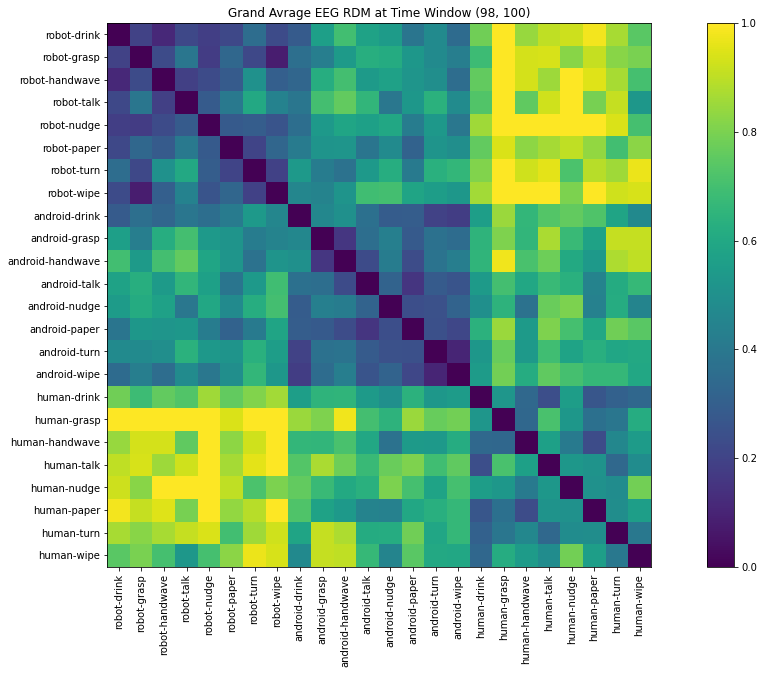

In [36]:
eeg_rdm_plot_heatmap(rsa_results_n_ff_2,windowed_eeg_rdm_dict_n_sff,"occipital","agent_hamming",stimuli_list)

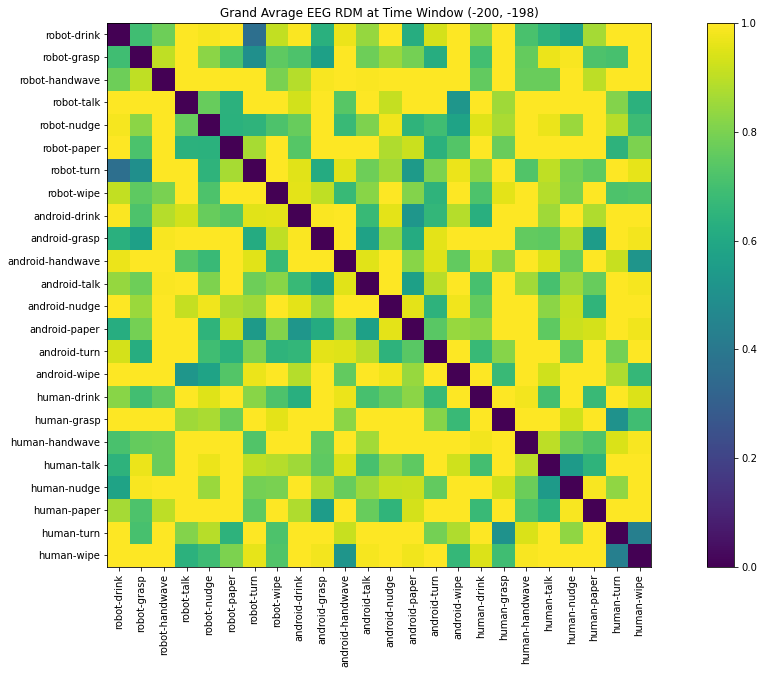

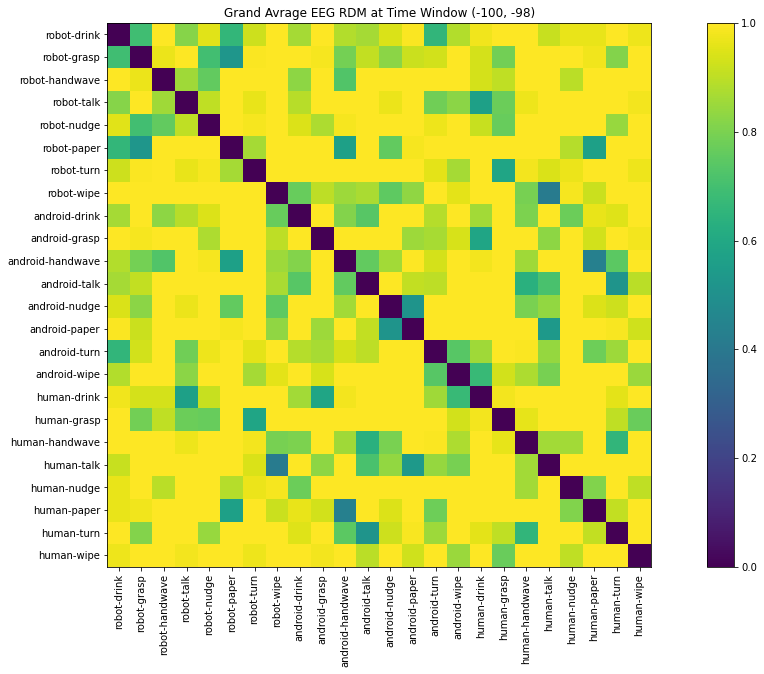

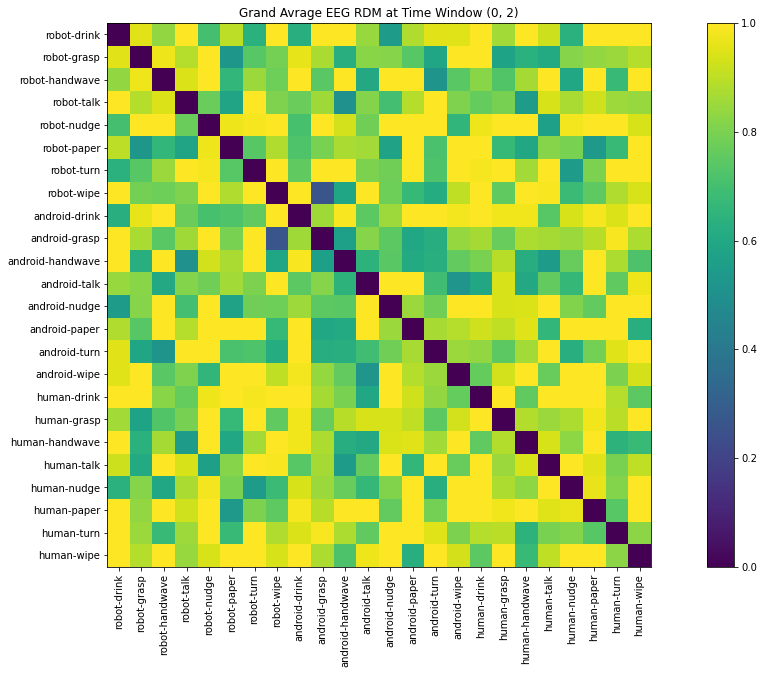

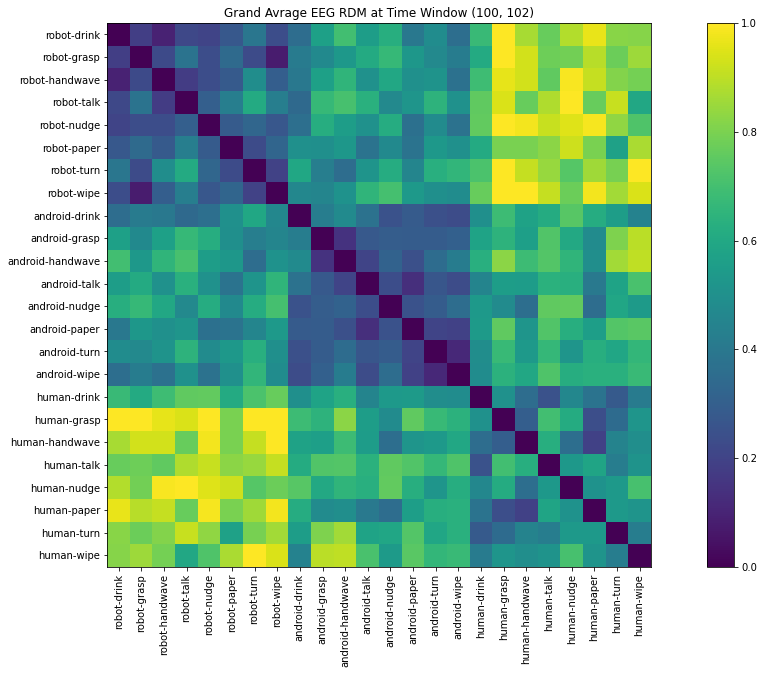

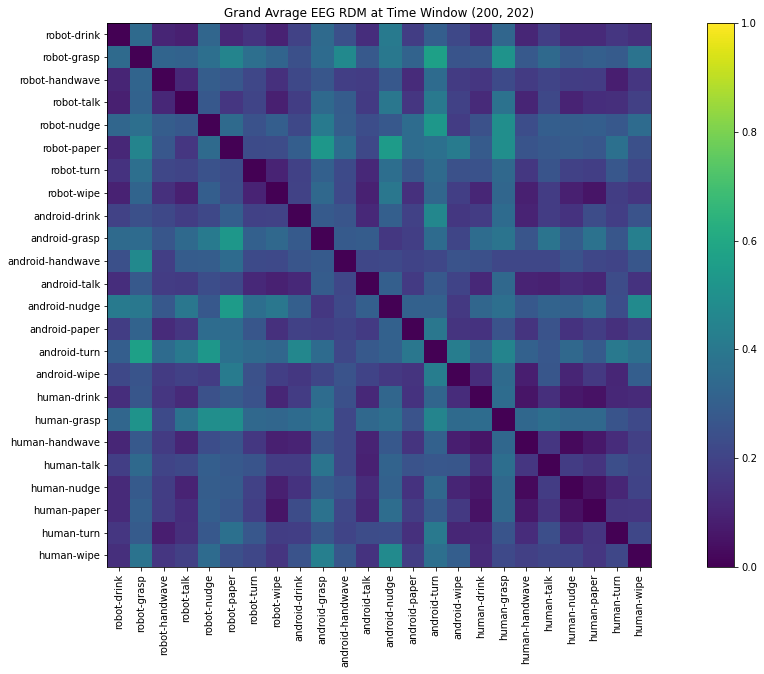

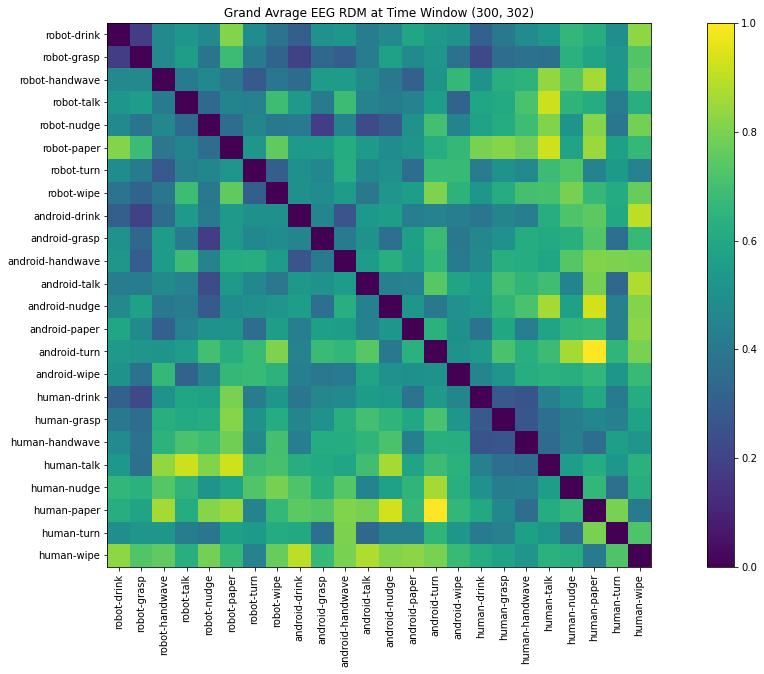

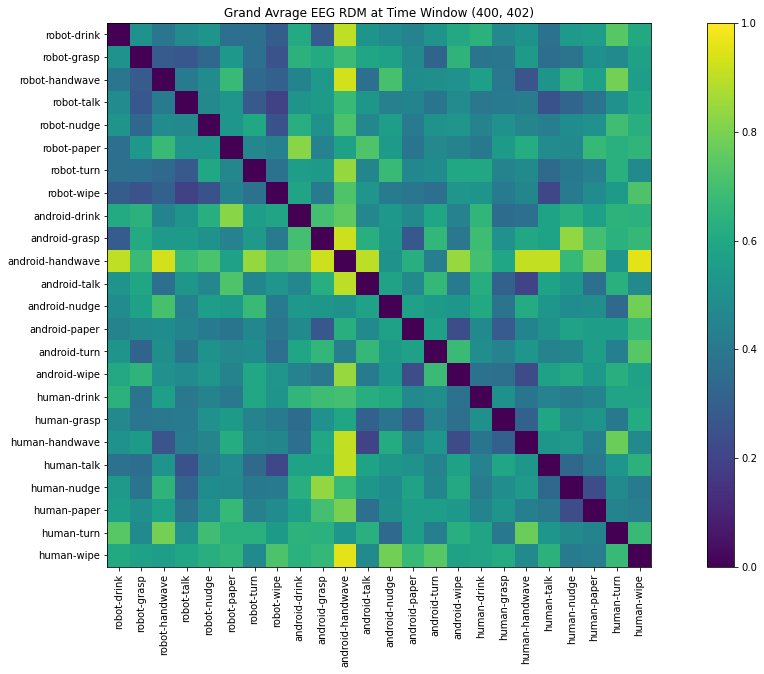

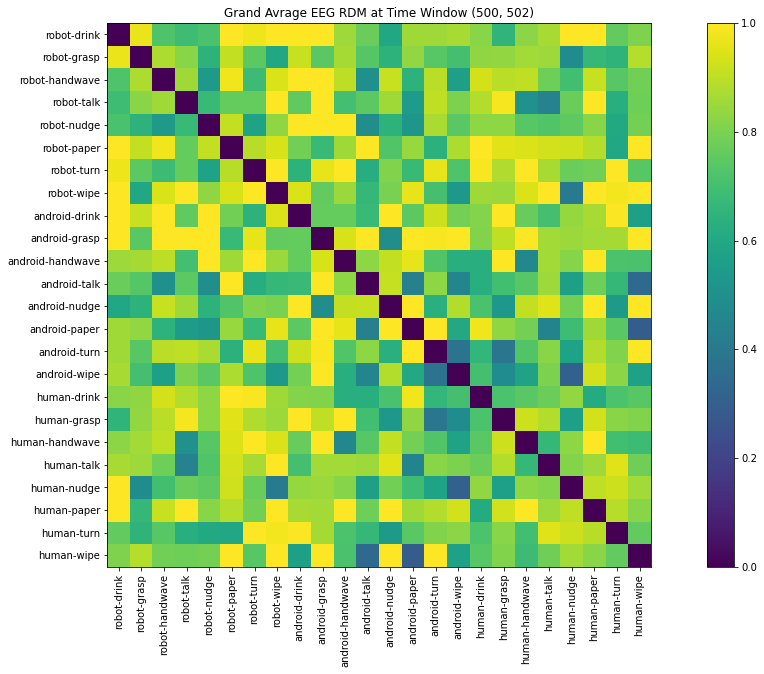

In [37]:
for i in range(-200,600,100):
    eeg_rdm_plot_heatmap(rsa_results_n_ff_2,windowed_eeg_rdm_dict_n_sff,"occipital","agent_hamming",stimuli_list,(i,i+2))

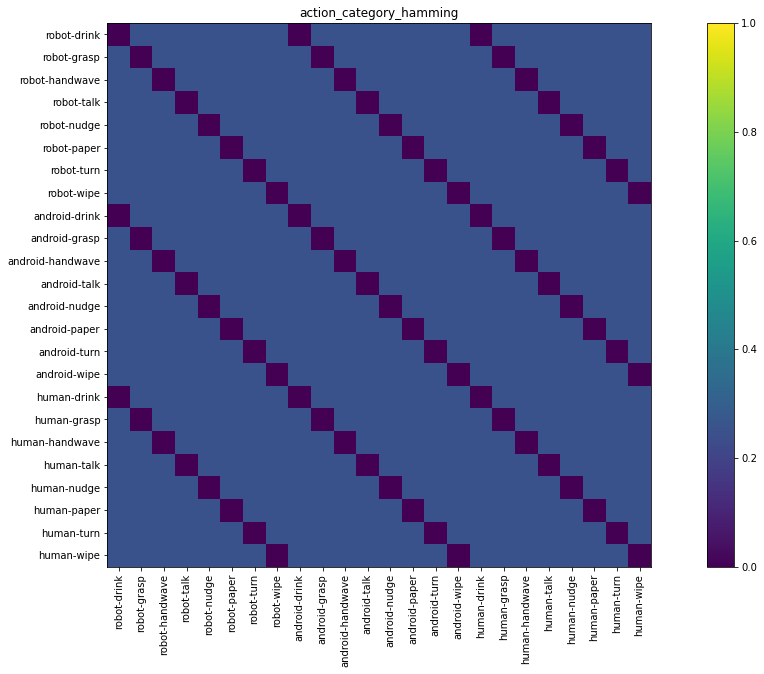

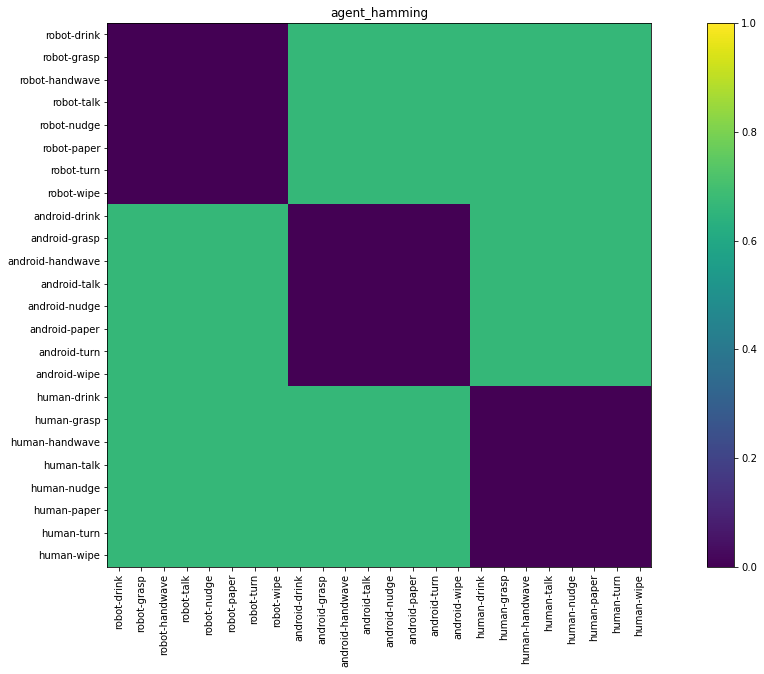

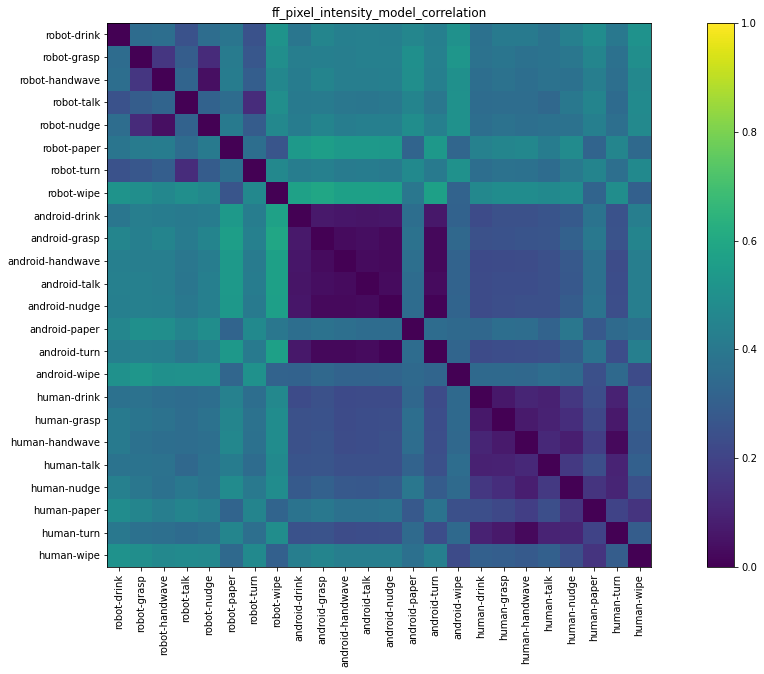

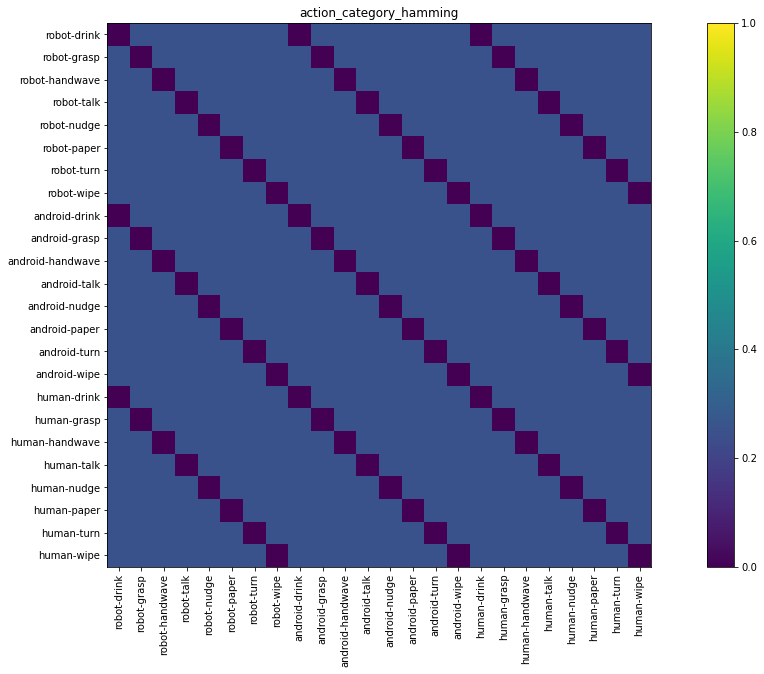

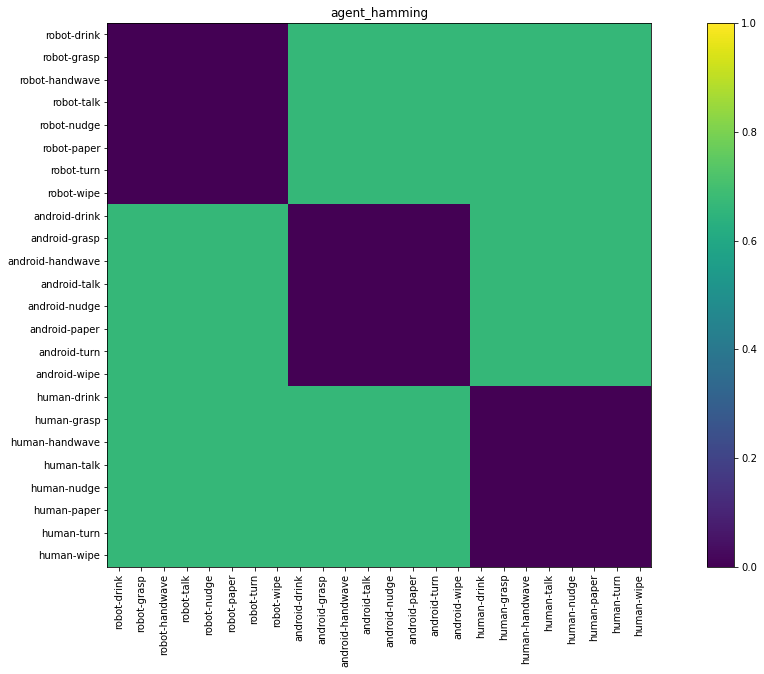

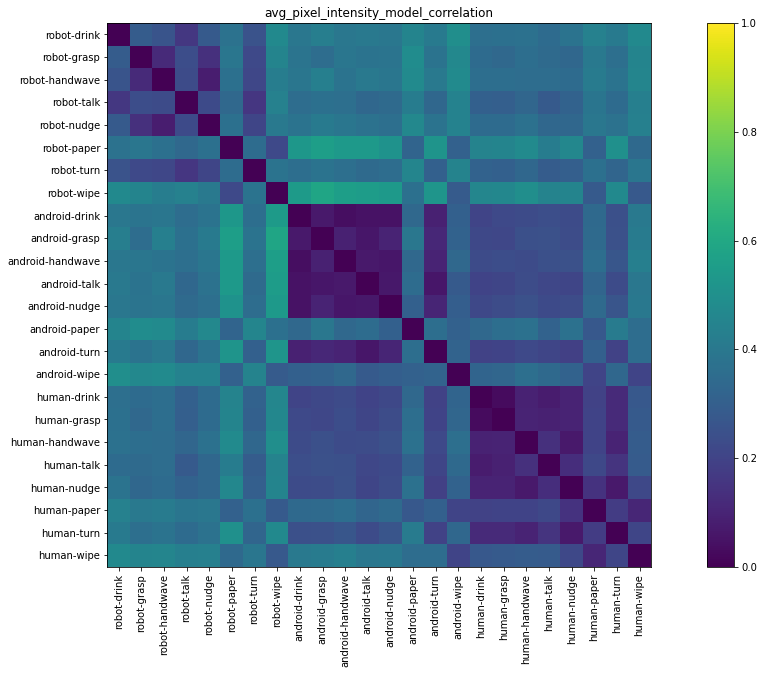

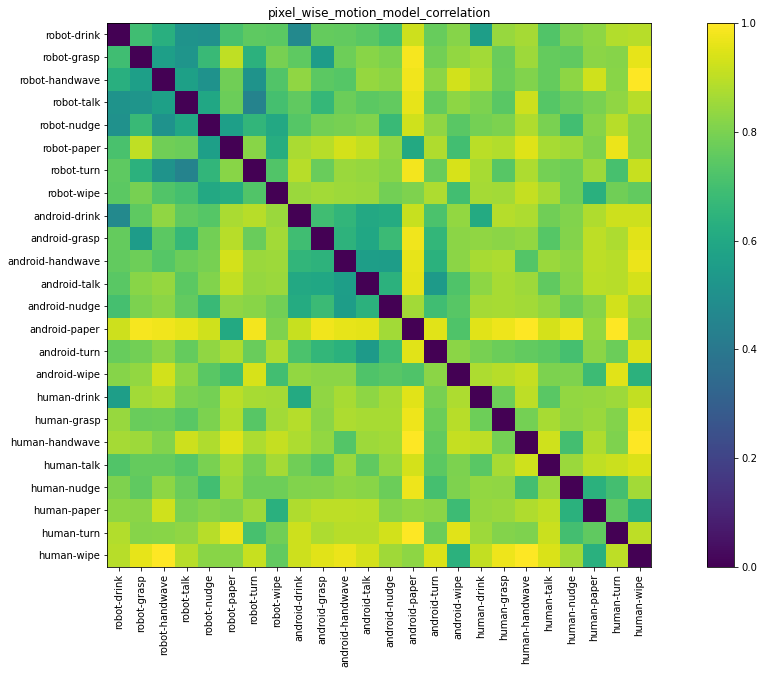

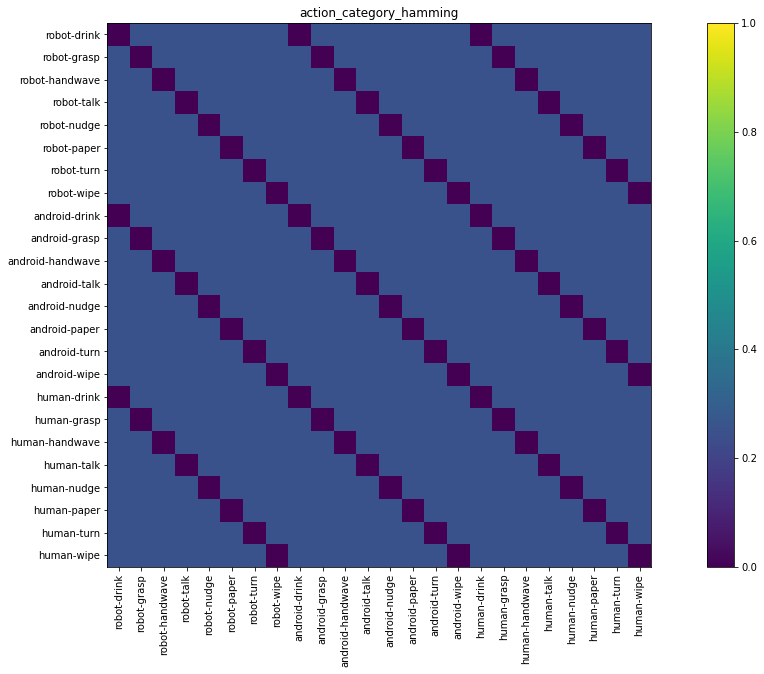

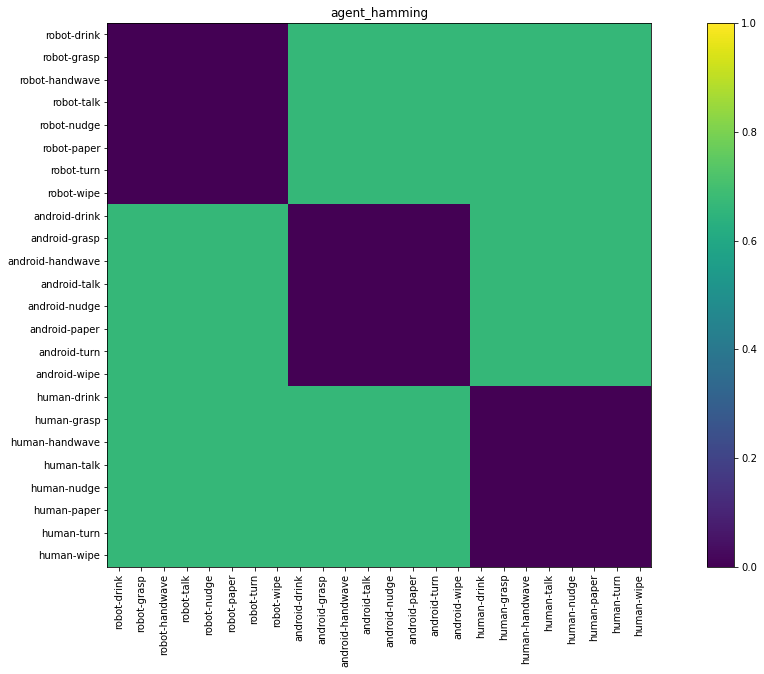

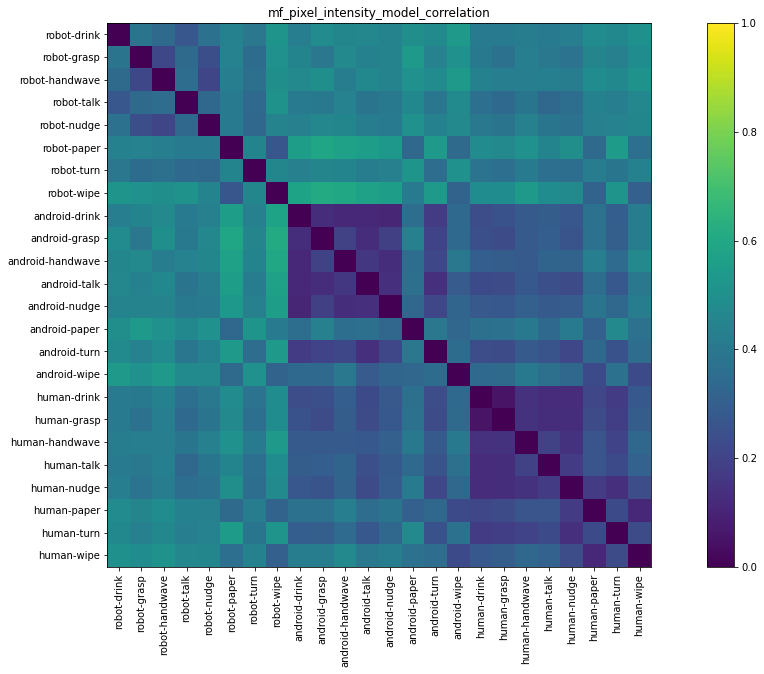

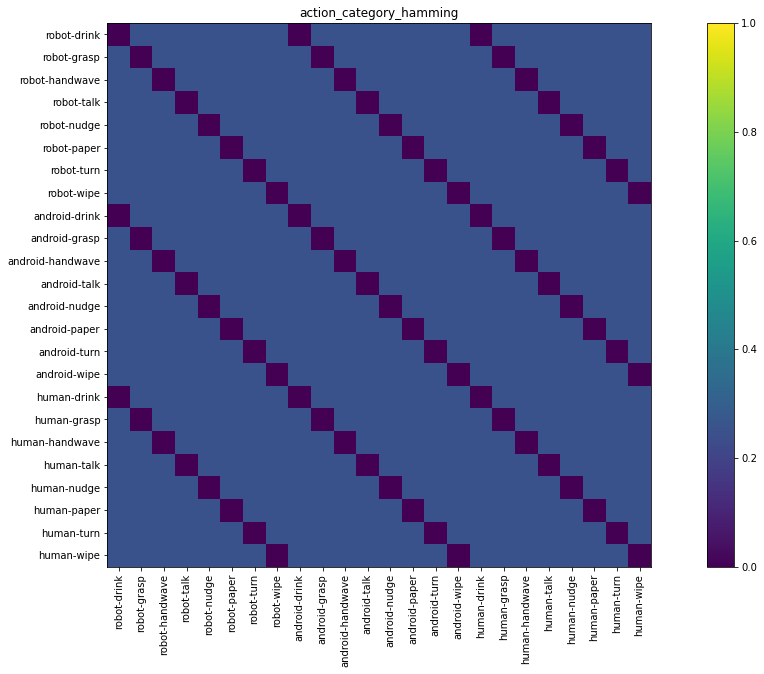

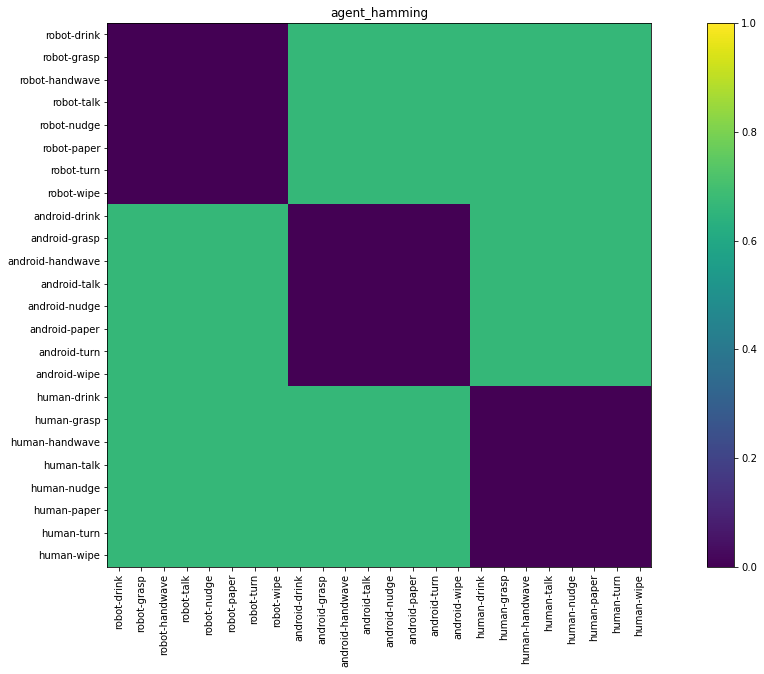

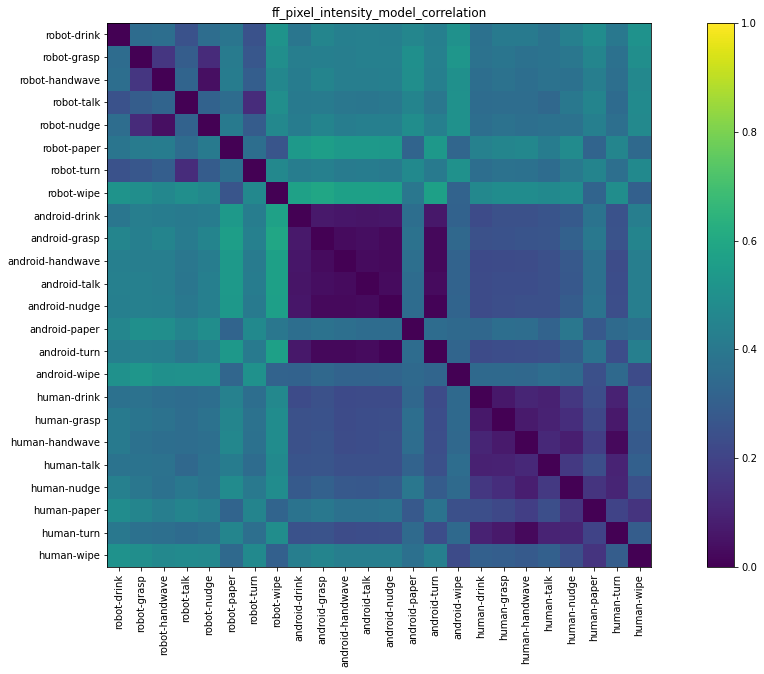

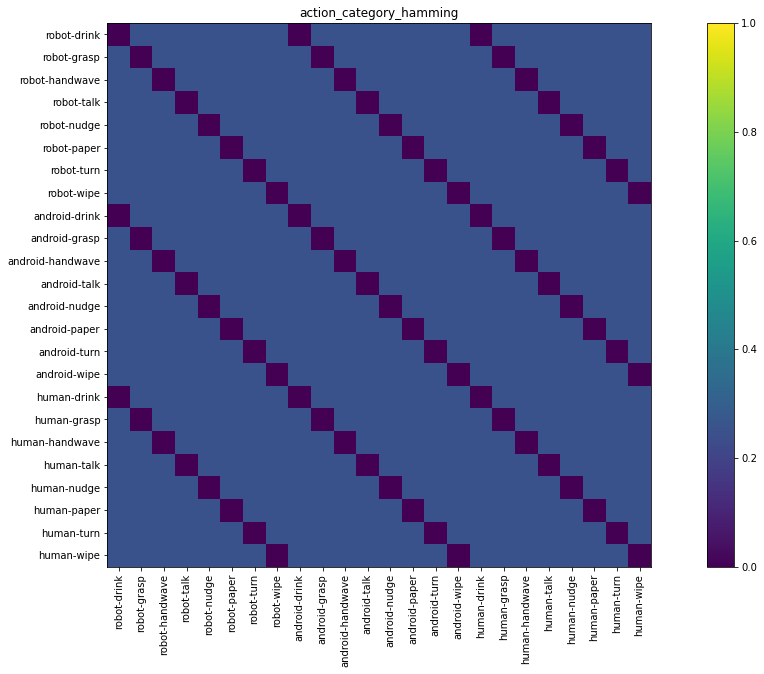

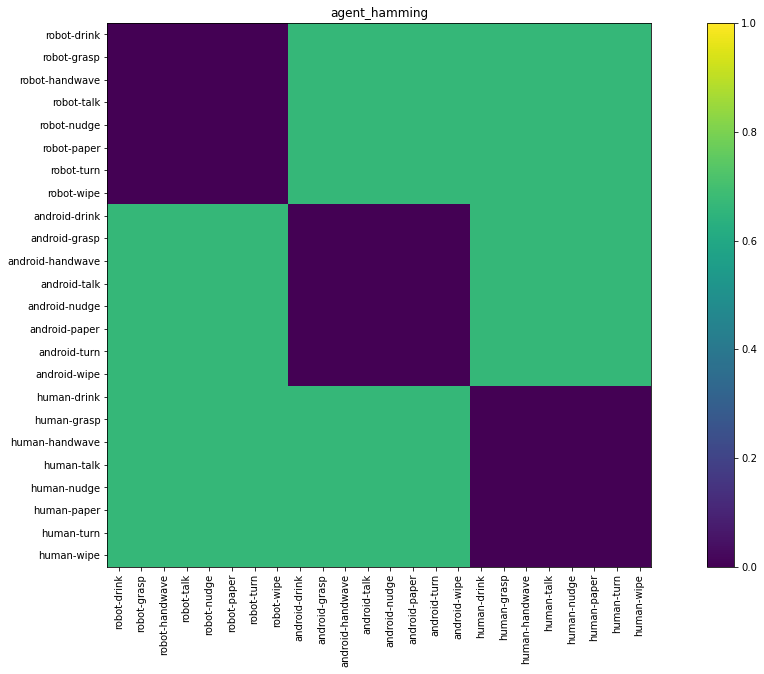

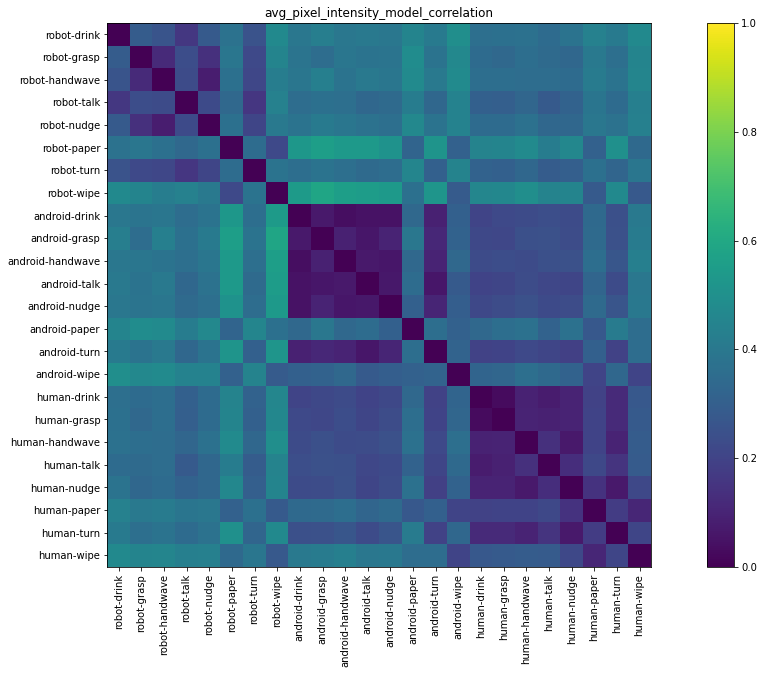

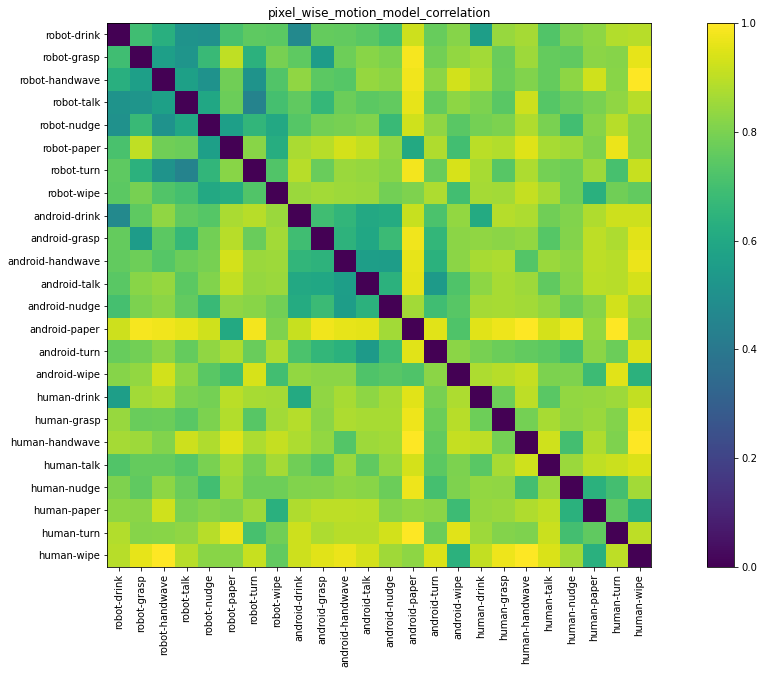

In [43]:
from rsa_io import load_rdm
import re


model_rdm_dict= {}
# Load still-ff models
pth_dir_list = ["/auto/data2/oelmas/RSA_Results_V2/Naive/Still_FF/modelRDMs/",
                "/auto/data2/oelmas/RSA_Results_V2/Naive/Video/modelRDMs/",
                "/auto/data2/oelmas/RSA_Results_V2/Naive/Still_MF/modelRDMs/",
                "/auto/data2/oelmas/RSA_Results_V2/Prior/Still/modelRDMs/",
                "/auto/data2/oelmas/RSA_Results_V2/Prior/Video/modelRDMs/"]
for dir_path in pth_dir_list :      
    for path in glob.glob(os.path.join(dir_path, '*.npy')):
        name = re.search('modelRDMs/(.*?).npy', path).group(1)
        plot_rdm_heatmap(load_rdm(path[:-4]), name,name+".png" ,stimuli_list,vmin=0,vmax=1)
        

{'action_category_hamming': array([0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.  , 0.25, 0.25, 0.25,
        0.25, 0.25, 0.25, 0.25, 0.  , 0.25, 0.25, 0.25, 0.25, 0.25, 0.25,
        0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.  , 0.25, 0.25,
        0.25, 0.25, 0.25, 0.25, 0.25, 0.  , 0.25, 0.25, 0.25, 0.25, 0.25,
        0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.  , 0.25, 0.25,
        0.25, 0.25, 0.25, 0.25, 0.25, 0.  , 0.25, 0.25, 0.25, 0.25, 0.25,
        0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.  , 0.25, 0.25, 0.25,
        0.25, 0.25, 0.25, 0.25, 0.  , 0.25, 0.25, 0.25, 0.25, 0.25, 0.25,
        0.25, 0.25, 0.25, 0.25, 0.25, 0.  , 0.25, 0.25, 0.25, 0.25, 0.25,
        0.25, 0.25, 0.  , 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25,
        0.25, 0.25, 0.  , 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.  ,
        0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.  , 0.25,
        0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.  , 0.25, 0.25, 0.25, 0.25,
        0.2

In [133]:
print()

ff_pixel_intensity_model_correlation


In [ ]:
subjects = list(seperated_subjects_data["subject_no"].unique())


In [ ]:
seperated_subjects_data

In [ ]:
def plot_seperated_subjects(seperated_subjects_dataframe, model_name, electrode_region):
    colors = px.colors.qualitative.Dark24
    fig = make_subplots(rows=2, cols=2,shared_yaxes=False,
                        subplot_titles=("Naive Still ", "Naive Video", 
                                        "Prior Still", "Prior Video"))
    for row_no, exp_type in enumerate(['naive', 'prior']):
        for col_no, stm_type in enumerate(['still', 'video']):
            color_no=0
            df_to_plot = seperated_subjects_dataframe[(seperated_subjects_dataframe["experiment_type"] == exp_type) &
            (seperated_subjects_dataframe["stimulus_type"] == stm_type)&
            (seperated_subjects_dataframe["model_name"] == model_name)&
            (seperated_subjects_dataframe["electrode_region"] == electrode_region)]
            
            for subject in subjects:
                fig.add_trace(go.Scatter(x=df_to_plot[df_to_plot["subject_no"]==subject]["time"],
                        y=df_to_plot[df_to_plot["subject_no"]==subject]["kendall_tau"],
                        mode="lines",
                        name="Subject" +str(subject),
                        line_color=colors[color_no],
                        legendgroup=str(subject)),
                        row = row_no+1, col=col_no+1) 
                color_no = color_no + 1
                    
    fig.update_layout(
        height=1000, width=1000,
        title= model_name + electrode_region)                
    fig.show()

In [ ]:
plot_seperated_subjects(seperated_subjects_data,"agent_hamming","occipital")

In [ ]:
fig = make_subplots()
for subject in subjects:
    df_subject = df_to_plot[df_to_plot["Subject No"]==subject]
    fig.add_trace(go.Scatter(x=df_subject["Time window"],
                            y=df_subject["Kendall tau"],
                            mode="lines",
                            name="Subject: " +str(subject)))
fig.show()

In [ ]:
df_subject

In [ ]:
trace_high = go.Scatter(
                x=df_to_plot[(df_to_plot["Experiment Type"] == "naive") & (df_to_plot["Stimuli Type"] == "still")]["Time window"],
                y=df_to_plot[(df_to_plot["Experiment Type"] == "naive") & (df_to_plot["Stimuli Type"] == "still")]["Kendall tau"],
                name = "Naive still",
                line = dict(color = '#17BECF'),
                opacity = 0.8)

trace_low = go.Scatter(
                x=df_to_plot[(df_to_plot["Experiment Type"] == "naive") & (df_to_plot["Stimuli Type"] == "video")]["Time window"],
                y=df_to_plot[(df_to_plot["Experiment Type"] == "naive") & (df_to_plot["Stimuli Type"] == "video")]["Time window"],
                name = "Naive Video",
                line = dict(color = '#7F7F7F'),
                opacity = 0.8)

data = [trace_high,trace_low]
py.iplot(data, filename = "Naive still vs Naive video")

In [ ]:
def plot_prep(df):
    df.columns = [c.replace(' ', '_') for c in df.columns]
    df['Time_window'] = df['Time_window'].apply(lambda window: 2*(window[0]-100))

    df.rename({'Time_window': 'time'}, axis=1, inplace=True)

In [ ]:
def load_models(path):
    electrode_regions = ['central', 'frontal', 'temporal', 'whole_brain', 'occipital', 'parietal', 'temporal']
    electrode_models = dict()
    #(exp_type, stimulus_type,electrode_region)

    for electrode_region in electrode_regions:
        f=path+electrode_region+'_results.pkl'
        #with open(path+electrode_region+'_results.pkl', 'rb') as f: 
        #    electrode_models[electrode_region], significant_rdms, eeg_rdm_dist_metric, model_rdm_dist_metric, correct, alpha, el_r = pickle.load(f)
        electrode_models[electrode_region], significant_rdms, eeg_rdm_dist_metric, model_rdm_dist_metric, correct, alpha, el_r = pd.read_pickle(f)
        plot_prep(electrode_models[electrode_region])

    return electrode_models
    

In [ ]:
def plot(electrode_models, electrode_region):
    df= electrode_models[electrode_region]
    fig = px.line(df, x=df.time, y=df.Kendall_tau, 
                color="Model_name")
    shapes=[
            dict(
                type="rect",
                # x-reference is assigned to the x-values
                xref="x",
                # y-reference is assigned to the plot paper [0,1]
                yref="paper",
                x0="-200",
                y0=0,
                x1="0",
                y1=1,
                fillcolor="cornflowerblue",
                opacity=0.3,
                layer="below",
                line_width=0,
            )
    ]

    '''updatemenus=[
        dict(
            direction = "down",
            buttons=[ {
                    'method': 'restyle',
                    'label': electrode_region,
                    'args': [ 
                        {'y': [ electrode_models[electrode_region].Kendall_tau ]},
                    ]
                } for electrode_region in electrode_regions],
            pad={"r": 10, "t": 10},
            showactive=True,
            x=0.4,
            xanchor="left",
            y=1.13,
            yanchor="top"
        ),
    ]'''


    fig.update_layout(
        #updatemenus=updatemenus,
        shapes=shapes,
        #annotations=[ dict(text="Select the electrode: ",  showarrow=False,
        #                         x=0, y=1.08, yref="paper", align="left"),
        #],
        title="Electrode: " + electrode_region
    )

    fig.show()

In [ ]:
pth = '/home/sena/PycharmProjects/CCN-RSA/RSA_Results/Naive/Still/'
electrode_models=load_models(pth)
plot(electrode_models, 'parietal' )

In [ ]:
paths = {}
for exp_type in ['Naive', 'Prior']:
    for stm_type in ['Still', 'Video']:
        paths[(exp_type,stm_type)] ='/home/sena/PycharmProjects/CCN-RSA/RSA_Results/'+exp_type+'/'+stm_type+'/'


In [ ]:
electrode_models=load_models(paths['Prior','Video'])

In [ ]:
test_df = electrode_models['occipital']

In [ ]:
pos_corr_rdms =  test_df[ test_df.Kendall_tau > 0]

alpha=0.001
correct = True
n_test = 1
if correct:
    n_test = 400
    significant_rdms = pos_corr_rdms[pos_corr_rdms["Kendall_p-value"]/2 <= (alpha/n_test)]

In [ ]:
mark = [t for t in significant_rdms[significant_rdms["Model_name"] == "movement_nature_hamming"].time ]

In [ ]:
mark

In [ ]:
df = test_df[test_df.Model_name == "movement_nature_hamming"]
fig = px.line(df, x=df.time, y=df.Kendall_tau, 
            color="Model_name")
shapes=[
    dict(
        type="rect",
        # x-reference is assigned to the x-values
        xref="x",

        # y-reference is assigned to the plot paper [0,1]
        yref="paper",
        x0="-200",
        y0=0,
        x1="0",
        y1=1,
        fillcolor="cornflowerblue",
        opacity=0.3,
        layer="below",
        line_width=0
    )
]

fig.add_trace(
    go.Scatter(
        mode='markers',
        x=mark,
        y=[-.1 for i in range(len(mark))],
        marker=dict(
            color='LightSkyBlue',
            size=5
        ),
        showlegend=False
    )
)

fig.update_layout(
    shapes=shapes,
    title="Testing markers " 
)

fig.show()

In [ ]:
plot(electrode_models, 'occipital' )

In [ ]:
electrode_models=load_models(paths['Naive','Video'])
plot(electrode_models, 'occipital' )

In [ ]:
df = electrode_models['parietal']

In [ ]:
fig = px.line(df, x=df.time, y=df.Kendall_tau, 
            color="Model_name")
shapes=[
        dict(
            type="rect",
            # x-reference is assigned to the x-values
            xref="x",
            # y-reference is assigned to the plot paper [0,1]
            yref="paper",
            x0="-200",
            y0=0,
            x1="0",
            y1=1,
            fillcolor="cornflowerblue",
            opacity=0.3,
            layer="below",
            line_width=0,
        )
]

'''updatemenus=[
    dict(
        type = "buttons",
        direction = "left",
        buttons=list([
            dict(
                args=["type", "models"],
                label="Models",
                method="restyle"
            ),
            dict(
                args=["type", "electrode_site"],
                label="Electrode site",
                method="restyle"
            ),
            dict(
                args=["type", "experiment_type"],
                label="Experiment type",
                method="restyle"
            ),
            dict(
                args=["type", "stimulus_type"],
                label="Stimulus type",
                method="restyle"
            )
        ]),
        pad={"r": 10, "t": 10},
        showactive=True,
        xanchor="left",
        x=0.31,
        yanchor="top",
        y=1.125
    ),
    dict(
        #type = "buttons",
        direction = "down",
        buttons=list([
            dict(
                args=["type", "frontal"],
                label="Frontal",
                method="restyle"
            ),
            dict(
                args=["type", "central"],
                label="Central",
                method="restyle"
            ),

            dict(
                args=["type", "temporal"],
                label="Temporal",
                method="restyle"
            ),
            dict(
                args=["type", "parietal"],
                label="Parietal",
                method="restyle"
            ),
            dict(
                args=["type", "occipital"],
                label="Occipital",
                method="restyle"
            ),
            dict(
                args=["type", "whole_brain"],
                label="Whole brain",
                method="restyle"
            )
        ]),
        pad={"r": 10, "t": 10},
        showactive=True,
        x=0.4,
        xanchor="left",
        y=1.02,
        yanchor="top"
    ),
        dict(
        direction = "down",
        buttons=list([
            dict(
                args=["type", "naive"],
                label="Naive",
                method="restyle"
            ),
            dict(
                args=["type", "prior"],
                label="Prior",
                method="restyle"
            )
        ]),
        pad={"r": 10, "t": 10},
        showactive=True,
        x=0.6,
        xanchor="left",
        y=1.02,
        yanchor="top"
    ),
        dict(
        #type = "buttons",
        direction = "down",
        buttons=list([
            dict(
                args=["type", "video"],
                label="Video",
                method="restyle"
            ),
            dict(
                args=["type", "still"],
                label="Still",
                method="restyle"
            )
        ]),
        pad={"r": 10, "t": 10},
        showactive=True,
        x=0.8,
        xanchor="left",
        y=1.02,
        yanchor="top"
    )
]
'''

fig.update_layout(
    #updatemenus=updatemenus,
    shapes=shapes,
    annotations=[ dict(text="Compare models",  showarrow=False,
                             x=0, y=1.08, yref="paper", align="left")
    ])





fig.show()

In [ ]:
model_correlation = dict()

for model_name in df.Model_name.unique():
    model_correlation[model_name]  = df.loc[df.Model_name==model_name].Kendall_tau

In [ ]:
type(model_correlation[model_name])

In [ ]:


fig = px.line(df, x=df.time, y=df.Kendall_tau, 
            color="Model_name")
shapes=[
        dict(
            type="rect",
            # x-reference is assigned to the x-values
            xref="x",
            # y-reference is assigned to the plot paper [0,1]
            yref="paper",
            x0="-200",
            y0=0,
            x1="0",
            y1=1,
            fillcolor="cornflowerblue",
            opacity=0.3,
            layer="below",
            line_width=0,
        )
]

updatemenus=[
    dict(
        type = "buttons",
        direction = "left",
        buttons=list([
            dict(
                args=["type", "models"],
                label="Models",
                method="restyle"
            ),
            dict(
                args=["type", "electrode_site"],
                label="Electrode site",
                method="restyle"
            ),
            dict(
                args=["type", "experiment_type"],
                label="Experiment type",
                method="restyle"
            ),
            dict(
                args=["type", "stimulus_type"],
                label="Stimulus type",
                method="restyle"
            )
        ]),
        pad={"r": 10, "t": 10},
        showactive=True,
        xanchor="left",
        x=0.31,
        yanchor="top",
        y=1.125
    ),
    dict(
        #type = "buttons",
        direction = "down",
        buttons=list([
            dict(
                args=["frontal", electrode_models["frontal"][["Model_name","Kendall_tau"]]],
                label="Frontal",
                method="restyle"
            ),
            dict(
                args=["central", electrode_models["central"][["Model_name","Kendall_tau"]]],
                label="Central",
                method="restyle"
            ),

            dict(
                args=["type", "temporal"],
                label="Temporal",
                method="restyle"
            ),
            dict(
                args=["type", "parietal"],
                label="Parietal",
                method="restyle"
            ),
            dict(
                args=["type", "occipital"],
                label="Occipital",
                method="restyle"
            ),
            dict(
                args=["type", "whole_brain"],
                label="Whole brain",
                method="restyle"
            )
        ]),
        pad={"r": 10, "t": 10},
        showactive=True,
        x=0.4,
        xanchor="left",
        y=1.02,
        yanchor="top"
    ),
        dict(
        direction = "down",
        buttons=list([
            dict(
                args=["type", "naive"],
                label="Naive",
                method="restyle"
            ),
            dict(
                args=["type", "prior"],
                label="Prior",
                method="restyle"
            )
        ]),
        pad={"r": 10, "t": 10},
        showactive=True,
        x=0.6,
        xanchor="left",
        y=1.02,
        yanchor="top"
    ),
        dict(
        #type = "buttons",
        direction = "down",
        buttons=list([
            dict(
                args=["type", "video"],
                label="Video",
                method="restyle"
            ),
            dict(
                args=["type", "still"],
                label="Still",
                method="restyle"
            )
        ]),
        pad={"r": 10, "t": 10},
        showactive=True,
        x=0.8,
        xanchor="left",
        y=1.02,
        yanchor="top"
    )
]


fig.update_layout(
    updatemenus=updatemenus,
    shapes=shapes,
    annotations=[ dict(text="Compare by: ",  showarrow=False,
                             x=0, y=1.08, yref="paper", align="left")
    ])





fig.show()

In [ ]:
significant_rdms.columns = [c.replace(' ', '_') for c in significant_rdms.columns]
significant_rdms['Time_window'] = significant_rdms['Time_window'].apply(lambda window: window[0]-100)

significant_rdms.rename({'Time_window': 'time'}, axis=1, inplace=True)

In [ ]:
fig.add_trace(
    go.Scatter(
        mode='markers',
        x=significant_rdms,
        y=significant_rdms.time.unique()))

In [ ]:
import pandas as pd

In [ ]:
significant_rdms

In [ ]:
import plotly
fig = dict(
layout = dict(
    xaxis1 = {'domain': [0.0, 0.44], 'anchor': 'y1', 'title': '1', 'range': [-2.25, 3.25]},
    yaxis1 = {'domain': [0.0, 1.0], 'anchor': 'x1', 'title': 'y', 'range': [-1, 11]},
    xaxis2 = {'domain': [0.56, 1.0], 'anchor': 'y2', 'title': '2', 'range': [-2.25, 3.25]},
    yaxis2 = {'domain': [0.0, 1.0], 'anchor': 'x2', 'title': 'y', 'range': [-1, 11]},
    title  = '',
    margin = {'t': 50, 'b': 50, 'l': 50, 'r': 50},
    updatemenus = [{'buttons': [{'args': [['0', '1', '2', '3'], {'frame': {'duration': 500.0, 'redraw': False}, 'fromcurrent': True, 'transition': {'duration': 0, 'easing': 'linear'}}], 'label': 'Play', 'method': 'animate'}, {'args': [[None], {'frame': {'duration': 0, 'redraw': False}, 'mode': 'immediate', 'transition': {'duration': 0}}], 'label': 'Pause', 'method': 'animate'}], 'direction': 'left', 'pad': {'r': 10, 't': 85}, 'showactive': True, 'type': 'buttons', 'x': 0.1, 'y': 0, 'xanchor': 'right', 'yanchor': 'top'}],
    sliders = [{'yanchor': 'top', 'xanchor': 'left', 'currentvalue': {'font': {'size': 16}, 'prefix': 'Frame: ', 'visible': True, 'xanchor': 'right'}, 'transition': {'duration': 500.0, 'easing': 'linear'}, 'pad': {'b': 10, 't': 50}, 'len': 0.9, 'x': 0.1, 'y': 0, 
                'steps': [{'args': [['0'], {'frame': {'duration': 500.0, 'easing': 'linear', 'redraw': False}, 'transition': {'duration': 0, 'easing': 'linear'}}], 'label': '0', 'method': 'animate'}, 
                          {'args': [['1'], {'frame': {'duration': 500.0, 'easing': 'linear', 'redraw': False}, 'transition': {'duration': 0, 'easing': 'linear'}}], 'label': '1', 'method': 'animate'}, 
                          {'args': [['2'], {'frame': {'duration': 500.0, 'easing': 'linear', 'redraw': False}, 'transition': {'duration': 0, 'easing': 'linear'}}], 'label': '2', 'method': 'animate'},
                          {'args': [['3'], {'frame': {'duration': 500.0, 'easing': 'linear', 'redraw': False}, 'transition': {'duration': 0, 'easing': 'linear'}}], 'label': '3', 'method': 'animate'}, 
                ]}]
),
data = [
    {'type': 'scatter', 'name': 'f1', 'x': [-2.  , -1.  ,  0.01,  1.  ,  2.  ,  3.  ], 'y': [  4,   1,   1, 1,   4,   9], 'hoverinfo': 'name+text', 'marker': {'opacity': 1.0, 'symbol': 'circle', 'line': {'width': 0, 'color': 'rgba(50,50,50,0.8)'}}, 'line': {'color': 'rgba(255,79,38,1.000000)'}, 'mode': 'markers+lines', 'fillcolor': 'rgba(255,79,38,0.600000)', 'legendgroup': 'f1', 'showlegend': True, 'xaxis': 'x1', 'yaxis': 'y1'},
{'type': 'scatter', 'name': 'f2', 'x': [-2.  , -1.  ,  0.01,  1.  ,  2.  ,  3.  ], 'y': [  2.5,   1,   1, 1,   2.5,   1], 'hoverinfo': 'name+text', 'marker': {'opacity': 1.0, 'symbol': 'circle', 'line': {'width': 0, 'color': 'rgba(50,50,50,0.8)'}}, 'line': {'color': 'rgba(79,102,165,1.000000)'}, 'mode': 'markers+lines', 'fillcolor': 'rgba(79,102,165,0.600000)', 'legendgroup': 'f2', 'showlegend': True, 'xaxis': 'x2', 'yaxis': 'y2'},
],
frames = [
    {'name' : '0', 'layout' : {},
     'data': [
         {'type': 'scatter', 'name': 'f1', 'x': [-2.  , -1.  ,  0.01,  1.  ,  2.  ,  3.  ], 'y': [  5,   8,   3, 2,   4,   0], 'hoverinfo': 'name+text', 'marker': {'opacity': 1.0, 'symbol': 'circle', 'line': {'width': 0, 'color': 'rgba(50,50,50,0.8)'}}, 'line': {'color': 'rgba(255,79,38,1.000000)'}, 'mode': 'markers+lines', 'fillcolor': 'rgba(255,79,38,0.600000)', 'legendgroup': 'f1', 'showlegend': True, 'xaxis': 'x1', 'yaxis': 'y1'}, 
#              {'type': 'scatter', 'name': 'f1', 'x': [-2.  , -1.  ,  0.01,  1.  ,  2.  ,  3.  ], 'y': [  4,   7,   2, 1,   3,   0], 'hoverinfo': 'name+text', 'marker': {'opacity': 1.0, 'symbol': 'circle', 'line': {'width': 0, 'color': 'rgba(50,50,50,0.8)'}}, 'line': {'color': 'rgba(255,79,38,1.000000)'}, 'mode': 'markers+lines', 'fillcolor': 'rgba(255,79,38,0.600000)', 'legendgroup': 'f1', 'showlegend': True, 'xaxis': 'x1', 'yaxis': 'y1'},
         {'type': 'scatter', 'name': 'f2', 'x': [-2.  , -1.  ,  0.01,  1.  ,  2.  ,  3.  ], 'y': [  3,   7,   4, 8,   5,   9], 'hoverinfo': 'name+text', 'marker': {'opacity': 1.0, 'symbol': 'circle', 'line': {'width': 0, 'color': 'rgba(50,50,50,0.8)'}}, 'line': {'color': 'rgba(79,102,165,1.000000)'}, 'mode': 'markers+lines', 'fillcolor': 'rgba(79,102,165,0.600000)', 'legendgroup': 'f2', 'showlegend': True, 'xaxis': 'x2', 'yaxis': 'y2'},
#              {'type': 'scatter', 'name': 'f2', 'x': [-2.  , -1.  ,  0.01,  1.  ,  2.  ,  3.  ], 'y': [  2,   8,   3, 9,   4,   9], 'hoverinfo': 'name+text', 'marker': {'opacity': 1.0, 'symbol': 'circle', 'line': {'width': 0, 'color': 'rgba(50,50,50,0.8)'}}, 'line': {'color': 'rgba(79,102,165,1.000000)'}, 'mode': 'markers+lines', 'fillcolor': 'rgba(79,102,165,0.600000)', 'legendgroup': 'f2', 'showlegend': True, 'xaxis': 'x2', 'yaxis': 'y2'}
     ],
    },
    {'name' : '1', 'layout' : {},
     'data': [
         {'type': 'scatter', 'name': 'f1', 'x': [-2.  , -1.  ,  0.01,  1.  ,  2.  ,  3.  ], 'y': [  4,   1,   1, 1,   4,   9], 'hoverinfo': 'name+text', 'marker': {'opacity': 1.0, 'symbol': 'circle', 'line': {'width': 0, 'color': 'rgba(50,50,50,0.8)'}}, 'line': {'color': 'rgba(255,79,38,1.000000)'}, 'mode': 'markers+lines', 'fillcolor': 'rgba(255,79,38,0.600000)', 'legendgroup': 'f1', 'showlegend': True, 'xaxis': 'x1', 'yaxis': 'y1'}, 
         {'type': 'scatter', 'name': 'f2', 'x': [-2.  , -1.  ,  0.01,  1.  ,  2.  ,  3.  ], 'y': [  2.5,   1,   1, 1,   2.5,   1], 'hoverinfo': 'name+text', 'marker': {'opacity': 1.0, 'symbol': 'circle', 'line': {'width': 0, 'color': 'rgba(50,50,50,0.8)'}}, 'line': {'color': 'rgba(79,102,165,1.000000)'}, 'mode': 'markers+lines', 'fillcolor': 'rgba(79,102,165,0.600000)', 'legendgroup': 'f2', 'showlegend': True, 'xaxis': 'x2', 'yaxis': 'y2'}],
    },
    {'name' : '2', 'layout' : {},
     'data': [
         {'type': 'scatter', 'name': 'f1', 'x': [-2.  , -1.  ,  0.01,  1.  ,  2.  ,  3.  ], 'y': [  5,   8,   3, 2,   4,   0], 'hoverinfo': 'name+text', 'marker': {'opacity': 1.0, 'symbol': 'circle', 'line': {'width': 0, 'color': 'rgba(50,50,50,0.8)'}}, 'line': {'color': 'rgba(255,79,38,1.000000)'}, 'mode': 'markers+lines', 'fillcolor': 'rgba(255,79,38,0.600000)', 'legendgroup': 'f1', 'showlegend': True, 'xaxis': 'x1', 'yaxis': 'y1'}, 
         {'type': 'scatter', 'name': 'f2', 'x': [-2.  , -1.  ,  0.01,  1.  ,  2.  ,  3.  ], 'y': [  3,   7,   4, 8,   5,   9], 'hoverinfo': 'name+text', 'marker': {'opacity': 1.0, 'symbol': 'circle', 'line': {'width': 0, 'color': 'rgba(50,50,50,0.8)'}}, 'line': {'color': 'rgba(79,102,165,1.000000)'}, 'mode': 'markers+lines', 'fillcolor': 'rgba(79,102,165,0.600000)', 'legendgroup': 'f2', 'showlegend': True, 'xaxis': 'x2', 'yaxis': 'y2'}],
    },
    {'name' : '3', 'layout' : {},
     'data': [
         {'type': 'scatter', 'name': 'f1', 'x': [-2.  , -1.  ,  0.01,  1.  ,  2.  ,  3.  ], 'y': [  4,   1,   1, 1,   4,   9], 'hoverinfo': 'name+text', 'marker': {'opacity': 1.0, 'symbol': 'circle', 'line': {'width': 0, 'color': 'rgba(50,50,50,0.8)'}}, 'line': {'color': 'rgba(255,79,38,1.000000)'}, 'mode': 'markers+lines', 'fillcolor': 'rgba(255,79,38,0.600000)', 'legendgroup': 'f1', 'showlegend': True, 'xaxis': 'x1', 'yaxis': 'y1'}, 
         {'type': 'scatter', 'name': 'f2', 'x': [-2.  , -1.  ,  0.01,  1.  ,  2.  ,  3.  ], 'y': [  2.5,   1,   1, 1,   2.5,   1], 'hoverinfo': 'name+text', 'marker': {'opacity': 1.0, 'symbol': 'circle', 'line': {'width': 0, 'color': 'rgba(50,50,50,0.8)'}}, 'line': {'color': 'rgba(79,102,165,1.000000)'}, 'mode': 'markers+lines', 'fillcolor': 'rgba(79,102,165,0.600000)', 'legendgroup': 'f2', 'showlegend': True, 'xaxis': 'x2', 'yaxis': 'y2'}],
    }
]
)
plotly.offline.plot(fig, auto_open=True)